In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

file_path = r"D:\OneDrive\0. Code\TDN\data\interim\Nam\DGMS_BCSVH_sanluong_nam.xlsx"

print("Đã import thành công các thư viện cần thiết!")


Đã import thành công các thư viện cần thiết!


In [5]:
data = pd.read_excel(file_path)# Ensure the data is loaded correctly
data

TD_THAMCHIEU       Ngày        SL  P.đặt     QVE
0    BUON_TUA_SRAH 2024-08-25  0.826000   66.5  133.08
1    BUON_TUA_SRAH 2024-08-26  0.780000   66.5  215.54
2    BUON_TUA_SRAH 2024-08-27  1.098750   66.5  168.08
3    BUON_TUA_SRAH 2024-08-28  0.217500   66.5  169.96
4    BUON_TUA_SRAH 2024-08-29  0.594000   66.5  136.42
..             ...        ...       ...    ...     ...
835       DAK_RTIH 2025-05-29  4.343935  370.6   14.66
836       DAK_RTIH 2025-05-30  4.341440  370.6   18.33
837       DAK_RTIH 2025-05-30  4.341440  370.6   14.85
838       DAK_RTIH 2025-05-31  4.300665  370.6   25.79
839       DAK_RTIH 2025-05-31  4.300665  370.6   14.97

[840 rows x 5 columns]

In [6]:
df_test = data[data['TD_THAMCHIEU'] == 'DAK_RTIH']
df_test

TD_THAMCHIEU       Ngày        SL  P.đặt    QVE
280     DAK_RTIH 2024-08-25  1.679935  377.1  62.09
281     DAK_RTIH 2024-08-25  1.679935  377.1  76.69
282     DAK_RTIH 2024-08-26  3.498680  377.1  60.75
283     DAK_RTIH 2024-08-26  3.498680  377.1  79.21
284     DAK_RTIH 2024-08-27  3.325655  377.1  63.32
..           ...        ...       ...    ...    ...
835     DAK_RTIH 2025-05-29  4.343935  370.6  14.66
836     DAK_RTIH 2025-05-30  4.341440  370.6  18.33
837     DAK_RTIH 2025-05-30  4.341440  370.6  14.85
838     DAK_RTIH 2025-05-31  4.300665  370.6  25.79
839     DAK_RTIH 2025-05-31  4.300665  370.6  14.97

[560 rows x 5 columns]

In [7]:
# Chuyển đổi cột Ngày sang định dạng datetime
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%Y.%m.%d')

# Tạo cột Tháng từ cột Ngày
data['Tháng'] = data['Ngày'].dt.to_period('M')

# Nhóm dữ liệu theo TD_THAMCHIEU và Tháng, tính tổng SL và trung bình QVE
result = data.groupby(['TD_THAMCHIEU', 'Tháng']).agg({
    'SL': 'sum',
    'QVE': 'mean'
}).reset_index()

# Hiển thị kết quả
print("Dữ liệu sau khi nhóm theo TD_THAMCHIEU và Tháng:")
result

Dữ liệu sau khi nhóm theo TD_THAMCHIEU và Tháng:


TD_THAMCHIEU    Tháng          SL         QVE
0   BUON_TUA_SRAH  2024-08    5.937375  189.518571
1   BUON_TUA_SRAH  2024-09   37.773750  240.575333
2   BUON_TUA_SRAH  2024-10   33.348625  137.512581
3   BUON_TUA_SRAH  2024-11   30.833000  109.274667
4   BUON_TUA_SRAH  2024-12   34.935275  112.098065
5   BUON_TUA_SRAH  2025-01   23.583500   58.059032
6   BUON_TUA_SRAH  2025-02   15.723875   38.395000
7   BUON_TUA_SRAH  2025-03    9.477775   31.148387
8   BUON_TUA_SRAH  2025-04   11.531250   31.901333
9   BUON_TUA_SRAH  2025-05   19.108125   60.974516
10       DAK_RTIH  2024-08   43.973790   70.736429
11       DAK_RTIH  2024-09  383.868809   97.162833
12       DAK_RTIH  2024-10  364.677630   73.482258
13       DAK_RTIH  2024-11  308.461290   32.633833
14       DAK_RTIH  2024-12  238.785740   14.112097
15       DAK_RTIH  2025-01  158.961450    8.645645
16       DAK_RTIH  2025-02  112.536660    7.479821
17       DAK_RTIH  2025-03  112.576290    6.563548
18       DAK_RTIH  2025-04  133.839205   10.168500
19       DAK_RTIH  2025-05  213.369212   15.829677

In [8]:
# Tạo dữ liệu tổng (TOTAL) cho result
total_data = result.groupby('Tháng').agg({
    'QVE': 'sum',
    'SL': 'sum'
}).reset_index()

total_data['TD_THAMCHIEU'] = 'TOTAL'

# Sắp xếp lại thứ tự cột cho nhất quán
total_data = total_data[['TD_THAMCHIEU', 'Tháng', 'QVE', 'SL']]

# Thêm dữ liệu TOTAL vào result
result_with_total = pd.concat([result, total_data], ignore_index=True)

print("Dữ liệu đã được bổ sung với tổng TOTAL:")
result_with_total


Dữ liệu đã được bổ sung với tổng TOTAL:


TD_THAMCHIEU    Tháng          SL         QVE
0   BUON_TUA_SRAH  2024-08    5.937375  189.518571
1   BUON_TUA_SRAH  2024-09   37.773750  240.575333
2   BUON_TUA_SRAH  2024-10   33.348625  137.512581
3   BUON_TUA_SRAH  2024-11   30.833000  109.274667
4   BUON_TUA_SRAH  2024-12   34.935275  112.098065
5   BUON_TUA_SRAH  2025-01   23.583500   58.059032
6   BUON_TUA_SRAH  2025-02   15.723875   38.395000
7   BUON_TUA_SRAH  2025-03    9.477775   31.148387
8   BUON_TUA_SRAH  2025-04   11.531250   31.901333
9   BUON_TUA_SRAH  2025-05   19.108125   60.974516
10       DAK_RTIH  2024-08   43.973790   70.736429
11       DAK_RTIH  2024-09  383.868809   97.162833
12       DAK_RTIH  2024-10  364.677630   73.482258
13       DAK_RTIH  2024-11  308.461290   32.633833
14       DAK_RTIH  2024-12  238.785740   14.112097
15       DAK_RTIH  2025-01  158.961450    8.645645
16       DAK_RTIH  2025-02  112.536660    7.479821
17       DAK_RTIH  2025-03  112.576290    6.563548
18       DAK_RTIH  2025-04  133.839205   10.168500
19       DAK_RTIH  2025-05  213.369212   15.829677
20          TOTAL  2024-08   49.911165  260.255000
21          TOTAL  2024-09  421.642559  337.738167
22          TOTAL  2024-10  398.026255  210.994839
23          TOTAL  2024-11  339.294290  141.908500
24          TOTAL  2024-12  273.721015  126.210161
25          TOTAL  2025-01  182.544950   66.704677
26          TOTAL  2025-02  128.260535   45.874821
27          TOTAL  2025-03  122.054065   37.711935
28          TOTAL  2025-04  145.370455   42.069833
29          TOTAL  2025-05  232.477337   76.804194

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dictionary để lưu trữ các mô hình regression
regression_models = {}
regression_results = []

# Lặp qua từng giá trị unique của TD_THAMCHIEU, loại trừ TOTAL
for td_value in result[result['TD_THAMCHIEU'] != 'TOTAL']['TD_THAMCHIEU'].unique():
    # Lọc dữ liệu cho TD_THAMCHIEU hiện tại
    subset_data = result[result['TD_THAMCHIEU'] == td_value]
    
    # Kiểm tra có đủ dữ liệu để xây dựng regression không (ít nhất 2 điểm)
    if len(subset_data) >= 2:
        # Chuẩn bị dữ liệu
        X = subset_data['QVE'].values.reshape(-1, 1)  # Biến đầu vào
        y = subset_data['SL'].values  # Biến đầu ra
        
        # Tạo và huấn luyện mô hình regression
        model = LinearRegression()
        model.fit(X, y)
        
        # Dự đoán và tính R²
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        
        # Lưu trữ mô hình và kết quả
        regression_models[td_value] = model
        regression_results.append({
            'TD_THAMCHIEU': td_value,
            'Slope (Hệ số góc)': model.coef_[0],
            'Intercept (Giao điểm)': model.intercept_,
            'R² Score': r2,
            'Phương trình': f'SL = {model.coef_[0]:.4f} * QVE + {model.intercept_:.4f}'
        })
        
        print(f"TD_THAMCHIEU: {td_value}")
        print(f"Phương trình regression: SL = {model.coef_[0]:.4f} * QVE + {model.intercept_:.4f}")
        print(f"R² Score: {r2:.4f}")
        print("-" * 50)

# Tạo DataFrame với kết quả regression
regression_df = pd.DataFrame(regression_results)
print("\nBảng tổng hợp kết quả regression:")
regression_df

TD_THAMCHIEU: BUON_TUA_SRAH
Phương trình regression: SL = 0.0752 * QVE + 14.6321
R² Score: 0.2168
--------------------------------------------------
TD_THAMCHIEU: DAK_RTIH
Phương trình regression: SL = 1.8053 * QVE + 146.2992
R² Score: 0.2805
--------------------------------------------------

Bảng tổng hợp kết quả regression:


TD_THAMCHIEU  Slope (Hệ số góc)  Intercept (Giao điểm)  R² Score  \
0  BUON_TUA_SRAH            0.07522              14.632084  0.216760   
1       DAK_RTIH            1.80532             146.299197  0.280524   

                   Phương trình  
0   SL = 0.0752 * QVE + 14.6321  
1  SL = 1.8053 * QVE + 146.2992

In [34]:
qv_dubao = pd.read_csv(r"D:\OneDrive\0. Code\TDN\data\raw\Q_dubao\TongHop_Qv_TBNN_Thang_6-12_2025.csv")
qv_dubao

Thủy điện  Qv_TBNN T6/2025  Qv_TBNN T7/2025  Qv_TBNN T8/2025  \
0            Lai Châu           1032.0           2084.0           2317.0   
1    Khu giữa (LC-SL)            733.0           1294.0           1256.0   
2          Sơn La (*)           2080.0           3797.0           3995.0   
3    Khu giữa (SL-HB)            295.0            479.0            663.0   
4           Nậm Chiến             16.0             43.0             54.0   
5        Hòa Bình (*)           2330.0           4250.0           4526.0   
6            Bản Chát            262.0            377.0            272.0   
7    Khu giữa (BC-HQ)             80.0            121.0            100.0   
8      Huội Quảng (*)            327.0            487.0            367.0   
9         Tuyên Quang            529.0            779.0            762.0   
10             Bắc Hà            134.0            238.0            272.0   
11            Thác Bà            210.0            365.0            429.0   
12             Hủa Na             87.0            119.0            194.0   
13            Cửa Đạt             98.0            135.0            215.0   
14          Trung Sơn            237.0            396.0            568.0   
15             Bản Vẽ            121.0            179.0            336.0   
16          Quảng Trị              6.1              7.8             12.9   
17             A Lưới             13.7             10.3             12.3   
18         Hương Điền             25.4             21.2             26.1   
19          Bình Điền              7.4              9.9             23.1   
20           Đăk Mi 4             31.9             27.6             32.8   
21        Sông Bung 4             32.1             27.9             33.1   
22            A Vương             20.3             18.2             20.8   
23       Sông Tranh 2             42.7             35.2             37.1   
24     Sông Côn bậc 1              2.2              1.8              2.7   
25  KG (Sông Côn 1-2)              5.3              4.2              5.9   
26        Sông Bung 2              8.4              7.4              8.7   
27          Đăk Đrinh              9.9              8.0              8.1   
28             Đak Re              1.8              1.3              1.4   
29         Sông Ba Hạ            110.0            113.0            204.0   
30          Sông Hinh             15.4             13.3             12.4   
31           Vĩnh Sơn              4.6              4.3              5.1   
32       Krông H'Năng             10.2             30.3             46.7   
33              KaNak              8.6              8.9             11.1   
34     Thượng Kon Tum             12.6             15.9             24.1   
35          Pleikrong            100.8            166.2            275.3   
36              KG IA             99.8            137.9            222.3   
37               Ialy            203.6            302.8            495.0   
38           Sê San 4            262.0            361.0            578.0   
39      Buôn Tua Srah             72.9            101.8            166.7   
40              KG BK             71.8             94.7            166.2   
41          Buôn Kuôp            148.7            193.9            287.3   
42           Da M'Bri             13.9             21.8             30.0   
43          Đăk R'Tih             25.6             45.6             87.5   
44         Đồng Nai 2             44.9             74.4            118.6   
45         Đồng Nai 3             67.9             97.5            146.6   
46            Đa Nhim             19.7             19.4             21.2   
47           Đại Ninh             19.1             21.2             24.3   
48          Hàm Thuận             40.1             71.6            112.6   
49            Thác Mơ            104.0            178.5            266.7   
50             Trị An            404.0            669.0           1120.0   

    Qv_TBNN T9/2025  Qv_TBNN T10/2025  Qv_TBNN T11/2025  Qv

In [35]:
# Danh sách các thủy điện cần lọc
# thuy_dien_list = ['Bắc Hà', 'Bản Chát', 'Bản Vẽ', 'Hòa Bình (*)', 'Hủa Na', 'Lai Châu', 'Sơn La (*)', 'Tuyên Quang'] # Bắc
# thuy_dien_list = ['Buôn Tua Srah', 'Đăk Đrinh', "Đăk R'Tih", 'Hương Điền', 'Ialy', 'Quảng Trị', 'Sông Ba Hạ', 'Sông Bung 2', 'Sông Tranh 2', 'Thượng Kon Tum', 'Vĩnh Sơn'] # Trung
thuy_dien_list = ['Buôn Tua Srah', "Đăk R'Tih"] #nam

# Lọc dữ liệu theo danh sách thủy điện
qv_dubao_filtered = qv_dubao[qv_dubao['Thủy điện'].isin(thuy_dien_list)] 

print(f"Dữ liệu gốc có {len(qv_dubao)} dòng")
print(f"Sau khi lọc còn {len(qv_dubao_filtered)} dòng")
print(f"\nCác thủy điện có trong dữ liệu đã lọc:")
print(qv_dubao_filtered['Thủy điện'].unique())

print(f"\nDữ liệu đã lọc:")
# Sort theo thủy điện và tháng
qv_dubao_filtered = qv_dubao_filtered.sort_values(by=['Thủy điện']).reset_index(drop=True)
qv_dubao_filtered

Dữ liệu gốc có 51 dòng
Sau khi lọc còn 2 dòng

Các thủy điện có trong dữ liệu đã lọc:
['Buôn Tua Srah' "Đăk R'Tih"]

Dữ liệu đã lọc:


Thủy điện  Qv_TBNN T6/2025  Qv_TBNN T7/2025  Qv_TBNN T8/2025  \
0  Buôn Tua Srah             72.9            101.8            166.7   
1      Đăk R'Tih             25.6             45.6             87.5   

   Qv_TBNN T9/2025  Qv_TBNN T10/2025  Qv_TBNN T11/2025  Qv_TBNN T12/2025  
0            187.5             200.0             137.0              93.0  
1             86.1              73.6              32.0              14.0

In [36]:
# Mapping tên thủy điện từ dạng gốc sang dạng TD_THAMCHIEU
mapping_thuy_dien = {
    'Buôn Tua Srah': 'BUON_TUA_SRAH',
    # 'Đăk Đrinh': 'DAK_DRINH', 
    "Đăk R'Tih": 'DAK_RTIH',
    # 'Hương Điền': 'HUONG_DIEN',
    # 'Ialy': 'IALY',
    # 'Quảng Trị': 'QUANGTRI',
    # 'Sông Ba Hạ': 'SONG_BA_HA',
    # 'Sông Bung 2': 'SONG_BUNG_2',
    # 'Sông Tranh 2': 'SONG_TRANH_2',
    # 'Thượng Kon Tum': 'THUONG_KONTUM',
    # 'Vĩnh Sơn': 'VINH_SON'
}

# Tạo cột TD_THAMCHIEU mới
qv_dubao_filtered['TD_THAMCHIEU'] = qv_dubao_filtered['Thủy điện'].map(mapping_thuy_dien)

print("Kiểm tra mapping:")
print(qv_dubao_filtered[['Thủy điện', 'TD_THAMCHIEU']].drop_duplicates())

# Xóa cột THủy điện và thay thế bằng cột TD_THAMCHIEU
qv_dubao_filtered = qv_dubao_filtered.drop(columns=['Thủy điện'])
# Đưa cột TD_THAMCHIEU về đầu tiên
cols = qv_dubao_filtered.columns.tolist()
cols.remove('TD_THAMCHIEU')
cols.insert(0, 'TD_THAMCHIEU')
qv_dubao_filtered = qv_dubao_filtered[cols]


Kiểm tra mapping:
       Thủy điện   TD_THAMCHIEU
0  Buôn Tua Srah  BUON_TUA_SRAH
1      Đăk R'Tih       DAK_RTIH


In [37]:
# 1. Biến đổi DataFrame từ dạng rộng sang dạng dài (Melt)
# Điều này giúp ta có thể làm việc trên từng tháng một cách dễ dàng.
long_qv_dubao = qv_dubao_filtered.melt(
    id_vars=['TD_THAMCHIEU'], 
    var_name='Tháng_raw', 
    value_name='QVE_dubao'
)

# Chuẩn hóa cột tháng để có định dạng YYYY-MM
# Ví dụ: 'Qv_TBNN T6/2025' -> '2025-06'
long_qv_dubao['Tháng'] = long_qv_dubao['Tháng_raw'].str.extract(r'T(\d{1,2})\/(\d{4})').apply(
    lambda x: f"{x[1]}-{str(x[0]).zfill(2)}", axis=1
)

# 2. Ghép nối với bảng kết quả regression để lấy Slope và Intercept
# Ta chỉ cần các cột chứa thông tin mô hình từ regression_df
forecast_data = pd.merge(
    long_qv_dubao,
    regression_df[['TD_THAMCHIEU', 'Slope (Hệ số góc)', 'Intercept (Giao điểm)']],
    on='TD_THAMCHIEU',
    how='left' # Sử dụng left merge để giữ tất cả các tháng dự báo
)

# 3. Áp dụng phương trình hồi quy để dự báo SL
# SL_dubao = Slope * QVE_dubao + Intercept
forecast_data['SL_dubao'] = (
    forecast_data['Slope (Hệ số góc)'] * forecast_data['QVE_dubao'] + 
    forecast_data['Intercept (Giao điểm)']
)

# Tạo DataFrame kết quả cuối cùng, chỉ giữ lại các cột cần thiết
final_predictions = forecast_data[['TD_THAMCHIEU', 'Tháng', 'QVE_dubao', 'SL_dubao']].copy()

# Sắp xếp lại để dễ đọc
final_predictions = final_predictions.sort_values(by=['TD_THAMCHIEU', 'Tháng']).reset_index(drop=True)

print("Đã dự báo thành công sản lượng (SL) dựa trên QVE dự báo:")
final_predictions

Đã dự báo thành công sản lượng (SL) dựa trên QVE dự báo:


TD_THAMCHIEU    Tháng  QVE_dubao    SL_dubao
0   BUON_TUA_SRAH  2025-06       72.9   20.115645
1   BUON_TUA_SRAH  2025-07      101.8   22.289512
2   BUON_TUA_SRAH  2025-08      166.7   27.171311
3   BUON_TUA_SRAH  2025-09      187.5   28.735893
4   BUON_TUA_SRAH  2025-10      200.0   29.676147
5   BUON_TUA_SRAH  2025-11      137.0   24.937267
6   BUON_TUA_SRAH  2025-12       93.0   21.627573
7        DAK_RTIH  2025-06       25.6  192.515381
8        DAK_RTIH  2025-07       45.6  228.621775
9        DAK_RTIH  2025-08       87.5  304.264670
10       DAK_RTIH  2025-09       86.1  301.737222
11       DAK_RTIH  2025-10       73.6  279.170726
12       DAK_RTIH  2025-11       32.0  204.069427
13       DAK_RTIH  2025-12       14.0  171.573673

In [38]:
# Tạo dữ liệu tổng (TOTAL) cho final_predictions
total_data = final_predictions.groupby('Tháng').agg({
    'QVE_dubao': 'sum',
    'SL_dubao': 'sum'
}).reset_index()

total_data['TD_THAMCHIEU'] = 'TOTAL'

# Sắp xếp lại thứ tự cột cho nhất quán
total_data = total_data[['TD_THAMCHIEU', 'Tháng', 'QVE_dubao', 'SL_dubao']]

# Thêm dữ liệu TOTAL vào final_predictions
final_predictions_with_total = pd.concat([final_predictions, total_data], ignore_index=True)

print("Dữ liệu dự báo đã được bổ sung với tổng TOTAL:")
final_predictions_with_total


Dữ liệu dự báo đã được bổ sung với tổng TOTAL:


TD_THAMCHIEU    Tháng  QVE_dubao    SL_dubao
0   BUON_TUA_SRAH  2025-06       72.9   20.115645
1   BUON_TUA_SRAH  2025-07      101.8   22.289512
2   BUON_TUA_SRAH  2025-08      166.7   27.171311
3   BUON_TUA_SRAH  2025-09      187.5   28.735893
4   BUON_TUA_SRAH  2025-10      200.0   29.676147
5   BUON_TUA_SRAH  2025-11      137.0   24.937267
6   BUON_TUA_SRAH  2025-12       93.0   21.627573
7        DAK_RTIH  2025-06       25.6  192.515381
8        DAK_RTIH  2025-07       45.6  228.621775
9        DAK_RTIH  2025-08       87.5  304.264670
10       DAK_RTIH  2025-09       86.1  301.737222
11       DAK_RTIH  2025-10       73.6  279.170726
12       DAK_RTIH  2025-11       32.0  204.069427
13       DAK_RTIH  2025-12       14.0  171.573673
14          TOTAL  2025-06       98.5  212.631026
15          TOTAL  2025-07      147.4  250.911287
16          TOTAL  2025-08      254.2  331.435980
17          TOTAL  2025-09      273.6  330.473115
18          TOTAL  2025-10      273.6  308.846873
19          TOTAL  2025-11      169.0  229.006694
20          TOTAL  2025-12      107.0  193.201246

Vẽ biểu đồ lịch sử và dự báo cho các TD_THAMCHIEU: ['BUON_TUA_SRAH' 'DAK_RTIH' 'TOTAL']
- BUON_TUA_SRAH: 10 tháng lịch sử, 7 tháng dự báo.
- DAK_RTIH: 10 tháng lịch sử, 7 tháng dự báo.
- TOTAL: 10 tháng lịch sử, 7 tháng dự báo.


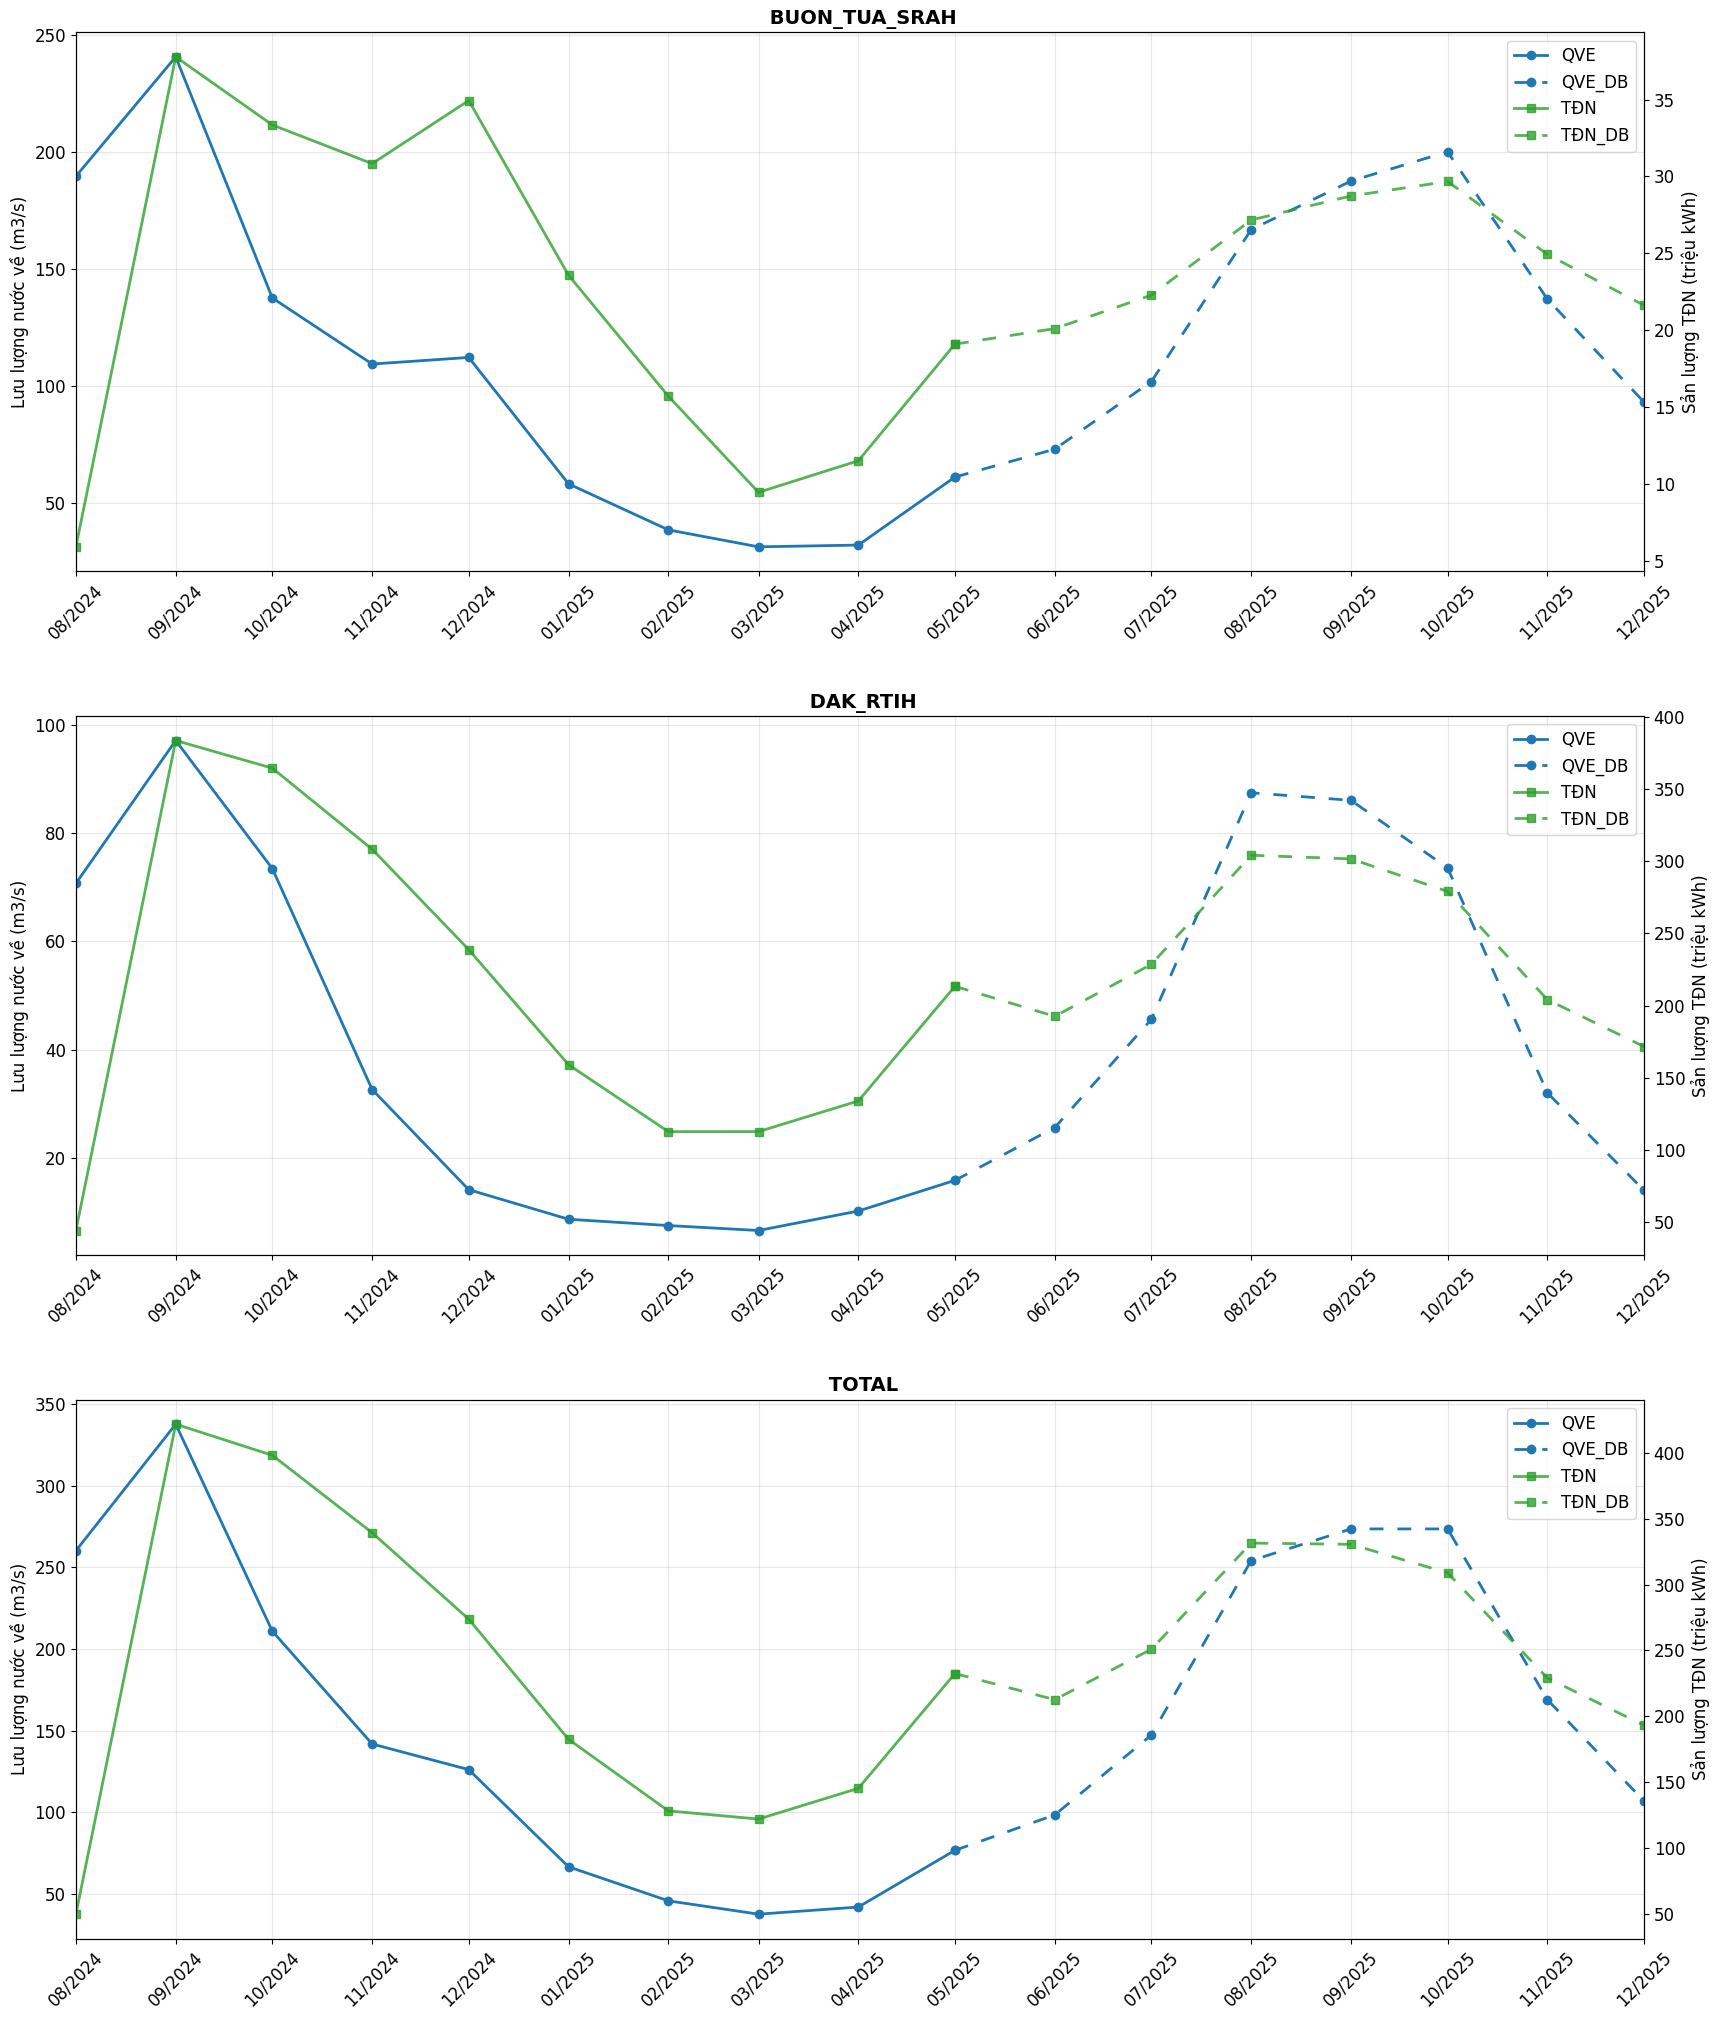


Đã vẽ biểu đồ lịch sử và dự báo cho 3 giá trị TD_THAMCHIEU
Biểu đồ đã được lưu thành công vào file 'output/QVE_SL_forecast_plots.pdf'


In [39]:
# Kiểm tra sự tồn tại của cả hai DataFrame cần thiết
if 'result_with_total' in locals() and 'final_predictions_with_total' in locals():
    unique_td_thamchieu = result_with_total['TD_THAMCHIEU'].unique()
    print(f"Vẽ biểu đồ lịch sử và dự báo cho các TD_THAMCHIEU: {unique_td_thamchieu}")
    
    n_plots = len(unique_td_thamchieu)
    fig, axes = plt.subplots(n_plots, 1, figsize=(18, 7 * n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    # Lặp qua từng TD_THAMCHIEU
    for i, td_value in enumerate(unique_td_thamchieu):
        # --- 1. XỬ LÝ VÀ VẼ DỮ LIỆU LỊCH SỬ (như cũ) ---
        subset_data = result_with_total[result_with_total['TD_THAMCHIEU'] == td_value].copy()
        
        monthly_data = subset_data.groupby('Tháng').agg({
            'QVE': 'mean',
            'SL': 'sum'
        }).reset_index()
        
        monthly_data['Tháng'] = monthly_data['Tháng'].dt.start_time
        
        ax1 = axes[i]
        
        # Vẽ QVE lịch sử
        color_qve_hist = 'tab:blue'
        ax1.set_ylabel('Lưu lượng nước về (m3/s)', color='black')
        line1 = ax1.plot(monthly_data['Tháng'], monthly_data['QVE'], 
                        color=color_qve_hist, linewidth=2, marker='o', label='QVE',
                        linestyle='-')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        # Vẽ SL lịch sử trên trục thứ hai
        ax2 = ax1.twinx()
        color_sl_hist = 'tab:green'
        ax2.set_ylabel('Sản lượng TĐN (triệu kWh)', color='black')
        line2 = ax2.plot(monthly_data['Tháng'], monthly_data['SL'], 
                        color=color_sl_hist, linewidth=2, marker='s', 
                        linestyle='-', label='SL_TĐN', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')

        # --- 2. XỬ LÝ VÀ VẼ BỔ SUNG DỮ LIỆU DỰ BÁO ---
        forecast_subset = final_predictions_with_total[final_predictions_with_total['TD_THAMCHIEU'] == td_value].copy()
        
        if not forecast_subset.empty:
            forecast_subset['Tháng'] = pd.to_datetime(forecast_subset['Tháng'])
            last_hist_point = monthly_data.iloc[-1:]
            
            plot_forecast_qve = pd.concat([last_hist_point[['Tháng', 'QVE']].rename(columns={'QVE':'QVE_dubao'}), forecast_subset[['Tháng', 'QVE_dubao']]])
            plot_forecast_sl = pd.concat([last_hist_point[['Tháng', 'SL']].rename(columns={'SL':'SL_dubao'}), forecast_subset[['Tháng', 'SL_dubao']]])
            
            ax1.plot(plot_forecast_qve['Tháng'], plot_forecast_qve['QVE_dubao'], 
                     color=color_qve_hist, linewidth=2, marker='o', label='QVE_DB',
                     linestyle='--', dashes=(5, 5))  # Thêm dashes để điều chỉnh độ thưa

            ax2.plot(plot_forecast_sl['Tháng'], plot_forecast_sl['SL_dubao'], 
                     color=color_sl_hist, linewidth=2, marker='s', linestyle='--', 
                     label='SL_DB', alpha=0.8, dashes=(5, 5))  # Thêm dashes để điều chỉnh độ thưa
            
            ax1.set_xlim(monthly_data['Tháng'].min(), forecast_subset['Tháng'].max())
        else:
            ax1.set_xlim(monthly_data['Tháng'].min(), monthly_data['Tháng'].max())

        ax1.set_title(f' {td_value}', fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        
        # Vẽ legend với 4 đường riêng biệt
        ax1.legend(lines1 + lines2, 
                  ['QVE', 'QVE_DB', 'TĐN', 'TĐN_DB'],  # Đổi tên nhãn cho phù hợp
                  loc='upper right', 
                  fontsize=12,
                  frameon=True)
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter, MonthLocator
        ax1.xaxis.set_major_locator(MonthLocator(interval=1))
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
        
        print(f"- {td_value}: {len(monthly_data)} tháng lịch sử, {len(forecast_subset)} tháng dự báo.")
    
    plt.tight_layout(pad=3.0)
    
    # Hiển thị biểu đồ
    plt.show()
    
    # Lưu biểu đồ với chất lượng cao
    fig.savefig('bieudu_output/QVE_SL_forecast_plots.pdf', 
                format='pdf',
                dpi=300,
                bbox_inches='tight',
                pad_inches=0.5)
    
    print(f"\nĐã vẽ biểu đồ lịch sử và dự báo cho {n_plots} giá trị TD_THAMCHIEU")
    print("Biểu đồ đã được lưu thành công vào file 'output/QVE_SL_forecast_plots.pdf'")
    
else:
    print("Chưa có đủ dữ liệu. Vui lòng chạy các cell đọc 'result_with_total' và tính toán 'final_predictions_with_total' trước!")

Các giá trị unique của TD_THAMCHIEU: ['BUON_TUA_SRAH' 'DAK_RTIH']


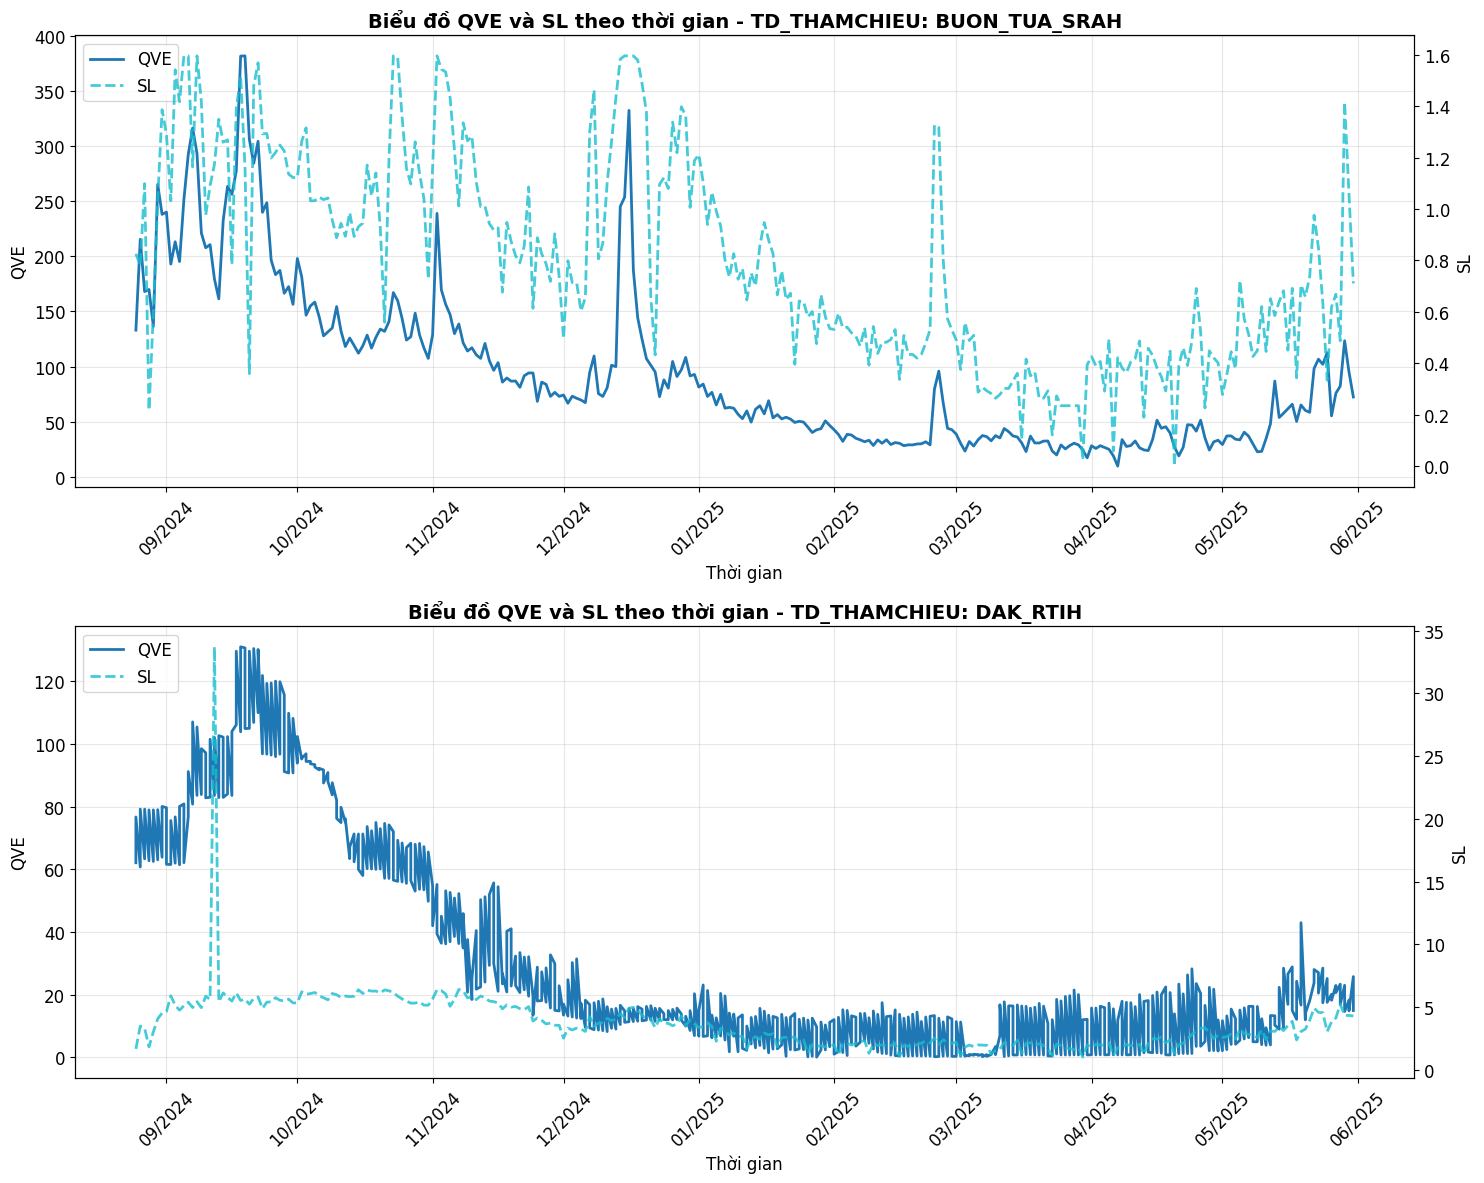


Đã vẽ 2 biểu đồ cho các giá trị TD_THAMCHIEU khác nhau


In [40]:

if 'data' in locals():
    unique_td_thamchieu = data['TD_THAMCHIEU'].unique()
    print(f"Các giá trị unique của TD_THAMCHIEU: {unique_td_thamchieu}")
    
    n_plots = len(unique_td_thamchieu)
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            subset_data['Ngày'] = pd.to_datetime(subset_data['Ngày'])
            subset_data = subset_data.sort_values('Ngày')
            x_axis = subset_data['Ngày']
            x_label = 'Thời gian'
        elif 'NGAY' in subset_data.columns:
            subset_data['NGAY'] = pd.to_datetime(subset_data['NGAY'])
            subset_data = subset_data.sort_values('NGAY')
            x_axis = subset_data['NGAY']
            x_label = 'Thời gian'
        else:
            x_axis = range(len(subset_data))
            x_label = 'Chỉ số'
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel(x_label)
        ax1.set_ylabel('QVE', color='black')
        line1 = ax1.plot(x_axis, subset_data['QVE'], color=color_qve, linewidth=2, label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL', color='black')
        line2 = ax2.plot(x_axis, subset_data['SL'], color=color_sl, linewidth=2, 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo thời gian - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        if 'Ngày' in subset_data.columns or 'NGAY' in subset_data.columns:
            ax1.tick_params(axis='x', rotation=45, labelcolor='black')
            
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%m/%Y')
            ax1.xaxis.set_major_formatter(date_formatter)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nĐã vẽ {n_plots} biểu đồ cho các giá trị TD_THAMCHIEU khác nhau")
    
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")

Vẽ biểu đồ theo tuần cho các giá trị TD_THAMCHIEU: ['BUON_TUA_SRAH' 'DAK_RTIH']
- BUON_TUA_SRAH: 41 tuần dữ liệu
- DAK_RTIH: 41 tuần dữ liệu


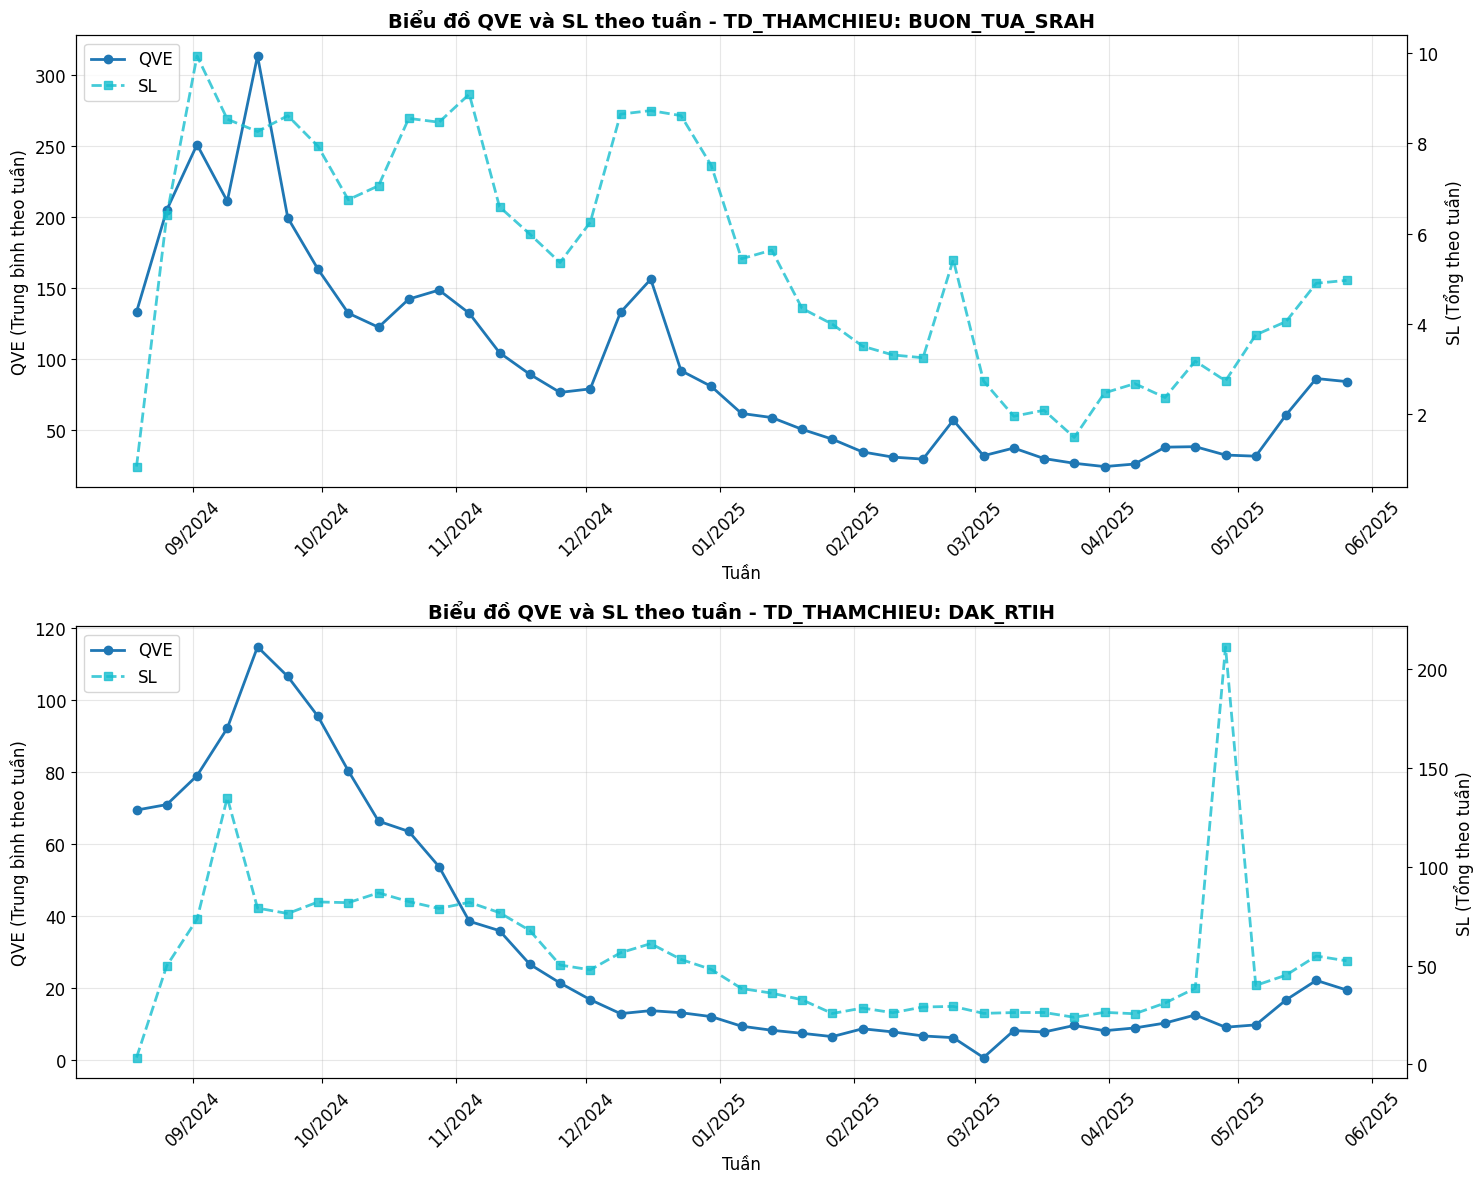


Đã vẽ biểu đồ theo tuần cho 2 giá trị TD_THAMCHIEU


In [26]:
if 'data' in locals():
    unique_td_thamchieu = data['TD_THAMCHIEU'].unique()
    print(f"Vẽ biểu đồ theo tuần cho các giá trị TD_THAMCHIEU: {unique_td_thamchieu}")
    
    n_plots = len(unique_td_thamchieu)
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            date_col = 'Ngày'
        elif 'NGAY' in subset_data.columns:
            date_col = 'NGAY'
        else:
            print(f"Không tìm thấy cột ngày cho {td_value}")
            continue
            
        subset_data[date_col] = pd.to_datetime(subset_data[date_col])
        subset_data = subset_data.sort_values(date_col)
        
        subset_data['Tuần'] = subset_data[date_col].dt.to_period('W')
        
        weekly_data = subset_data.groupby('Tuần').agg({
            'QVE': 'mean',
            'SL': 'sum'
        }).reset_index()
        
        weekly_data['Tuần'] = weekly_data['Tuần'].dt.start_time
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel('Tuần')
        ax1.set_ylabel('QVE (Trung bình theo tuần)', color='black')
        line1 = ax1.plot(weekly_data['Tuần'], weekly_data['QVE'], 
                        color=color_qve, linewidth=2, marker='o', label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL (Tổng theo tuần)', color='black')
        line2 = ax2.plot(weekly_data['Tuần'], weekly_data['SL'], 
                        color=color_sl, linewidth=2, marker='s', 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo tuần - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
        
        print(f"- {td_value}: {len(weekly_data)} tuần dữ liệu")
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nĐã vẽ biểu đồ theo tuần cho {n_plots} giá trị TD_THAMCHIEU")
    
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


Vẽ biểu đồ lịch sử và dự báo cho các TD_THAMCHIEU: ['BAC_HA', 'BAN_CHAT', 'BAN_VE', 'HOA_BINH', 'HUA_NA', 'LAI_CHAU', 'SON_LA', 'TUYEN_QUANG', 'TOTAL']
- BAC_HA: 14 tháng lịch sử, 7 tháng dự báo.
- BAN_CHAT: 14 tháng lịch sử, 7 tháng dự báo.
- BAN_VE: 14 tháng lịch sử, 7 tháng dự báo.
- HOA_BINH: 14 tháng lịch sử, 7 tháng dự báo.
- HUA_NA: 14 tháng lịch sử, 7 tháng dự báo.
- LAI_CHAU: 14 tháng lịch sử, 7 tháng dự báo.
- SON_LA: 14 tháng lịch sử, 7 tháng dự báo.
- TUYEN_QUANG: 14 tháng lịch sử, 7 tháng dự báo.
- TOTAL: 7 tháng dự báo.


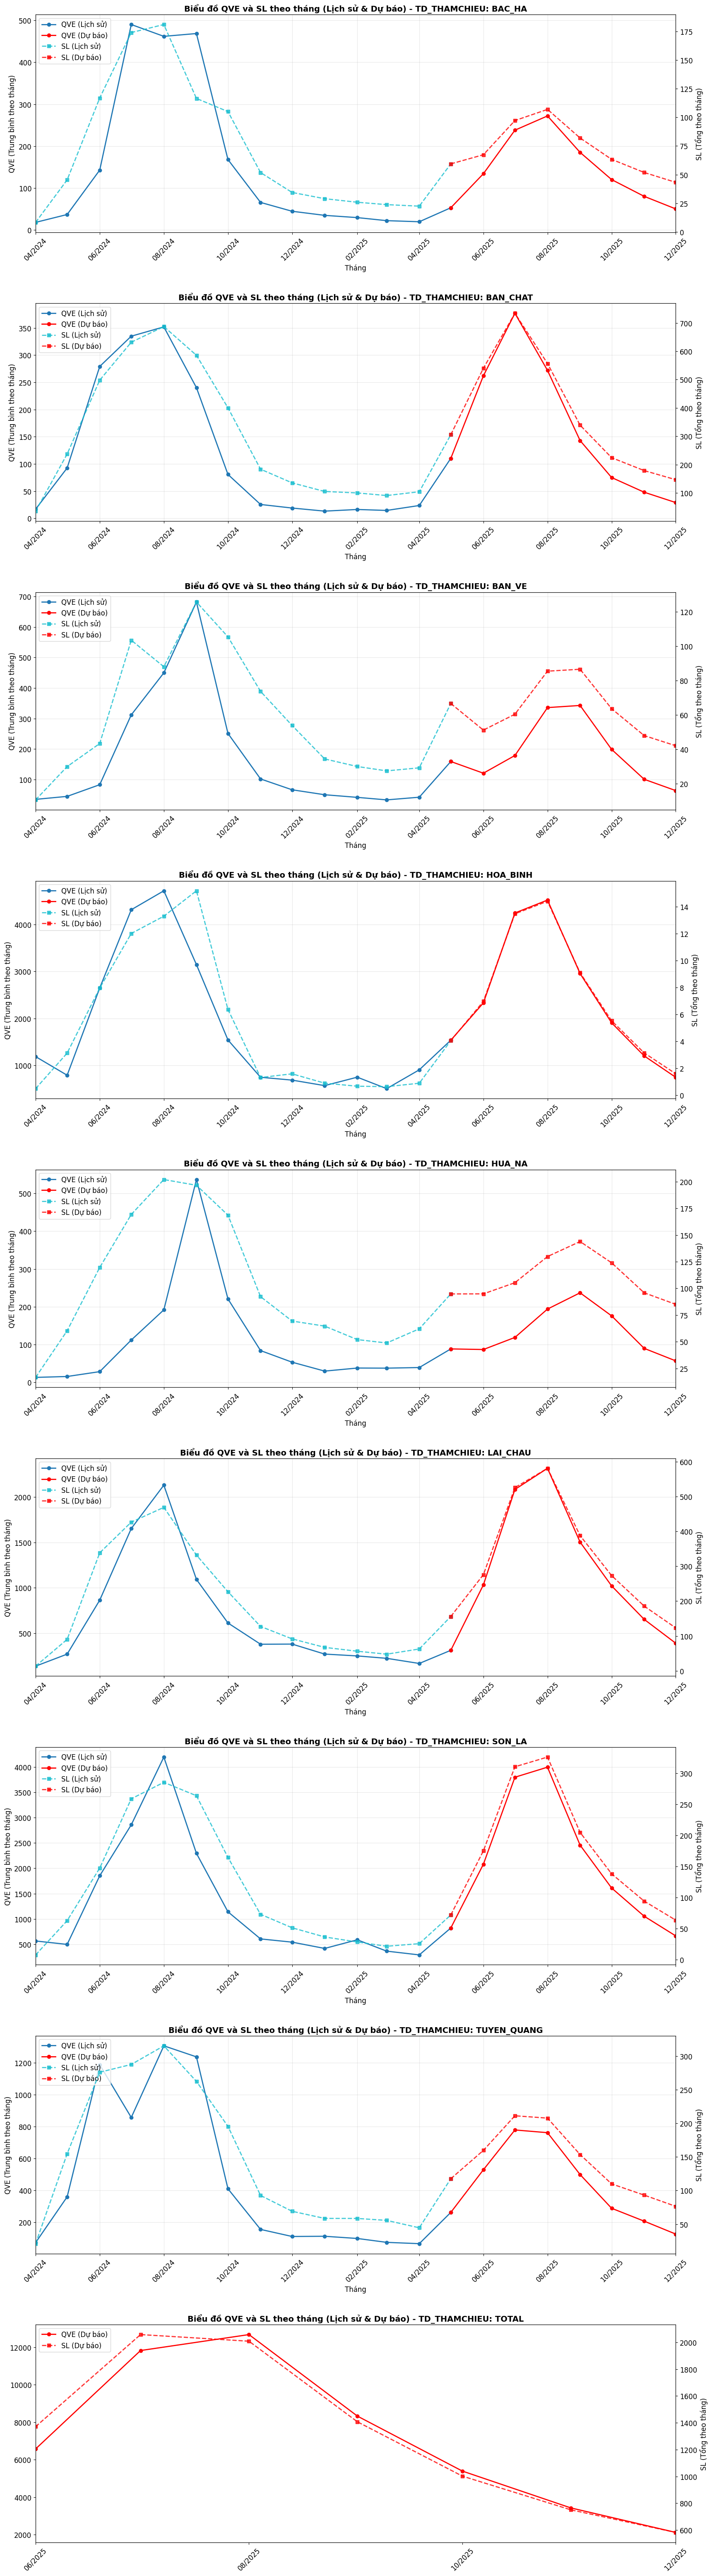


Đã vẽ biểu đồ lịch sử và dự báo cho 9 giá trị TD_THAMCHIEU


In [50]:
# Kiểm tra sự tồn tại của cả hai DataFrame cần thiết
if 'data' in locals() and 'final_predictions_with_total' in locals():
    # Lấy danh sách TD_THAMCHIEU từ data và thêm 'TOTAL' vào
    unique_td_thamchieu = list(data['TD_THAMCHIEU'].unique()) + ['TOTAL']
    print(f"Vẽ biểu đồ lịch sử và dự báo cho các TD_THAMCHIEU: {unique_td_thamchieu}")
    
    n_plots = len(unique_td_thamchieu)
    # Tăng chiều cao một chút để có thêm không gian cho chú thích
    fig, axes = plt.subplots(n_plots, 1, figsize=(18, 7 * n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    # Lặp qua từng TD_THAMCHIEU
    for i, td_value in enumerate(unique_td_thamchieu):
        ax1 = axes[i]
        
        if td_value != 'TOTAL':
            # --- 1. XỬ LÝ VÀ VẼ DỮ LIỆU LỊCH SỬ ---
            subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
            
            subset_data['Ngày'] = pd.to_datetime(subset_data['Ngày'])
            subset_data = subset_data.sort_values('Ngày')
            subset_data['Tháng'] = subset_data['Ngày'].dt.to_period('M')
            
            monthly_data = subset_data.groupby('Tháng').agg({
                'QVE': 'mean',
                'SL': 'sum'
            }).reset_index()
            
            monthly_data['Tháng'] = monthly_data['Tháng'].dt.start_time
            
            # Vẽ QVE lịch sử
            color_qve_hist = 'tab:blue'
            ax1.set_xlabel('Tháng')
            ax1.set_ylabel('QVE (Trung bình theo tháng)', color='black')
            line1 = ax1.plot(monthly_data['Tháng'], monthly_data['QVE'], 
                            color=color_qve_hist, linewidth=2, marker='o', label='QVE (Lịch sử)')
            ax1.tick_params(axis='y', labelcolor='black')
            ax1.grid(True, alpha=0.3)
            
            # Vẽ SL lịch sử trên trục thứ hai
            ax2 = ax1.twinx()
            color_sl_hist = 'tab:cyan'
            ax2.set_ylabel('SL (Tổng theo tháng)', color='black')
            line2 = ax2.plot(monthly_data['Tháng'], monthly_data['SL'], 
                            color=color_sl_hist, linewidth=2, marker='s', 
                            linestyle='--', label='SL (Lịch sử)', alpha=0.8)
            ax2.tick_params(axis='y', labelcolor='black')

        # --- 2. XỬ LÝ VÀ VẼ BỔ SUNG DỮ LIỆU DỰ BÁO ---
        forecast_subset = final_predictions_with_total[final_predictions_with_total['TD_THAMCHIEU'] == td_value].copy()
        
        if not forecast_subset.empty:
            # Chuyển cột Tháng (dạng string) sang datetime
            forecast_subset['Tháng'] = pd.to_datetime(forecast_subset['Tháng'])
            
            if td_value != 'TOTAL':
                # Để đường dự báo nối tiếp, ta cần điểm cuối của dữ liệu lịch sử
                last_hist_point = monthly_data.iloc[-1:]
                
                # Nối điểm cuối lịch sử vào đầu dữ liệu dự báo
                plot_forecast_qve = pd.concat([last_hist_point[['Tháng', 'QVE']].rename(columns={'QVE':'QVE_dubao'}), forecast_subset[['Tháng', 'QVE_dubao']]])
                plot_forecast_sl = pd.concat([last_hist_point[['Tháng', 'SL']].rename(columns={'SL':'SL_dubao'}), forecast_subset[['Tháng', 'SL_dubao']]])
            else:
                # Với TOTAL chỉ vẽ dữ liệu dự báo
                plot_forecast_qve = forecast_subset[['Tháng', 'QVE_dubao']]
                plot_forecast_sl = forecast_subset[['Tháng', 'SL_dubao']]
                
                # Tạo trục thứ hai cho TOTAL
                ax2 = ax1.twinx()
                ax2.set_ylabel('SL (Tổng theo tháng)', color='black')
                ax2.tick_params(axis='y', labelcolor='black')
            
            # Vẽ QVE dự báo (màu đỏ)
            ax1.plot(plot_forecast_qve['Tháng'], plot_forecast_qve['QVE_dubao'], 
                     color='red', linewidth=2, marker='o', label='QVE (Dự báo)')

            # Vẽ SL dự báo (màu đỏ)
            ax2.plot(plot_forecast_sl['Tháng'], plot_forecast_sl['SL_dubao'], 
                     color='red', linewidth=2, marker='s', linestyle='--', label='SL (Dự báo)', alpha=0.8)
            
            # Cập nhật giới hạn trục X
            if td_value != 'TOTAL':
                ax1.set_xlim(monthly_data['Tháng'].min(), forecast_subset['Tháng'].max())
            else:
                ax1.set_xlim(forecast_subset['Tháng'].min(), forecast_subset['Tháng'].max())
        else:
            # Nếu không có dự báo, chỉ giới hạn ở dữ liệu lịch sử
            ax1.set_xlim(monthly_data['Tháng'].min(), monthly_data['Tháng'].max())

        # --- 3. HOÀN THIỆN BIỂU ĐỒ ---
        ax1.set_title(f'Biểu đồ QVE và SL theo tháng (Lịch sử & Dự báo) - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        # Tự động gộp legend từ cả hai trục
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter, MonthLocator
        ax1.xaxis.set_major_locator(MonthLocator(interval=2))
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
        
        if td_value != 'TOTAL':
            print(f"- {td_value}: {len(monthly_data)} tháng lịch sử, {len(forecast_subset)} tháng dự báo.")
        else:
            print(f"- {td_value}: {len(forecast_subset)} tháng dự báo.")
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
    print(f"\nĐã vẽ biểu đồ lịch sử và dự báo cho {n_plots} giá trị TD_THAMCHIEU")
    
else:
    print("Chưa có đủ dữ liệu. Vui lòng chạy các cell đọc 'data' và tính toán 'final_predictions_with_total' trước!")

Vẽ biểu đồ theo tháng cho các giá trị TD_THAMCHIEU: ['BAC_HA' 'BAN_CHAT' 'BAN_VE' 'HOA_BINH' 'HUA_NA' 'LAI_CHAU' 'SON_LA'
 'TUYEN_QUANG']
- BAC_HA: 14 tháng dữ liệu
- BAN_CHAT: 14 tháng dữ liệu
- BAN_VE: 14 tháng dữ liệu
- HOA_BINH: 14 tháng dữ liệu
- HUA_NA: 14 tháng dữ liệu
- LAI_CHAU: 14 tháng dữ liệu
- SON_LA: 14 tháng dữ liệu
- TUYEN_QUANG: 14 tháng dữ liệu


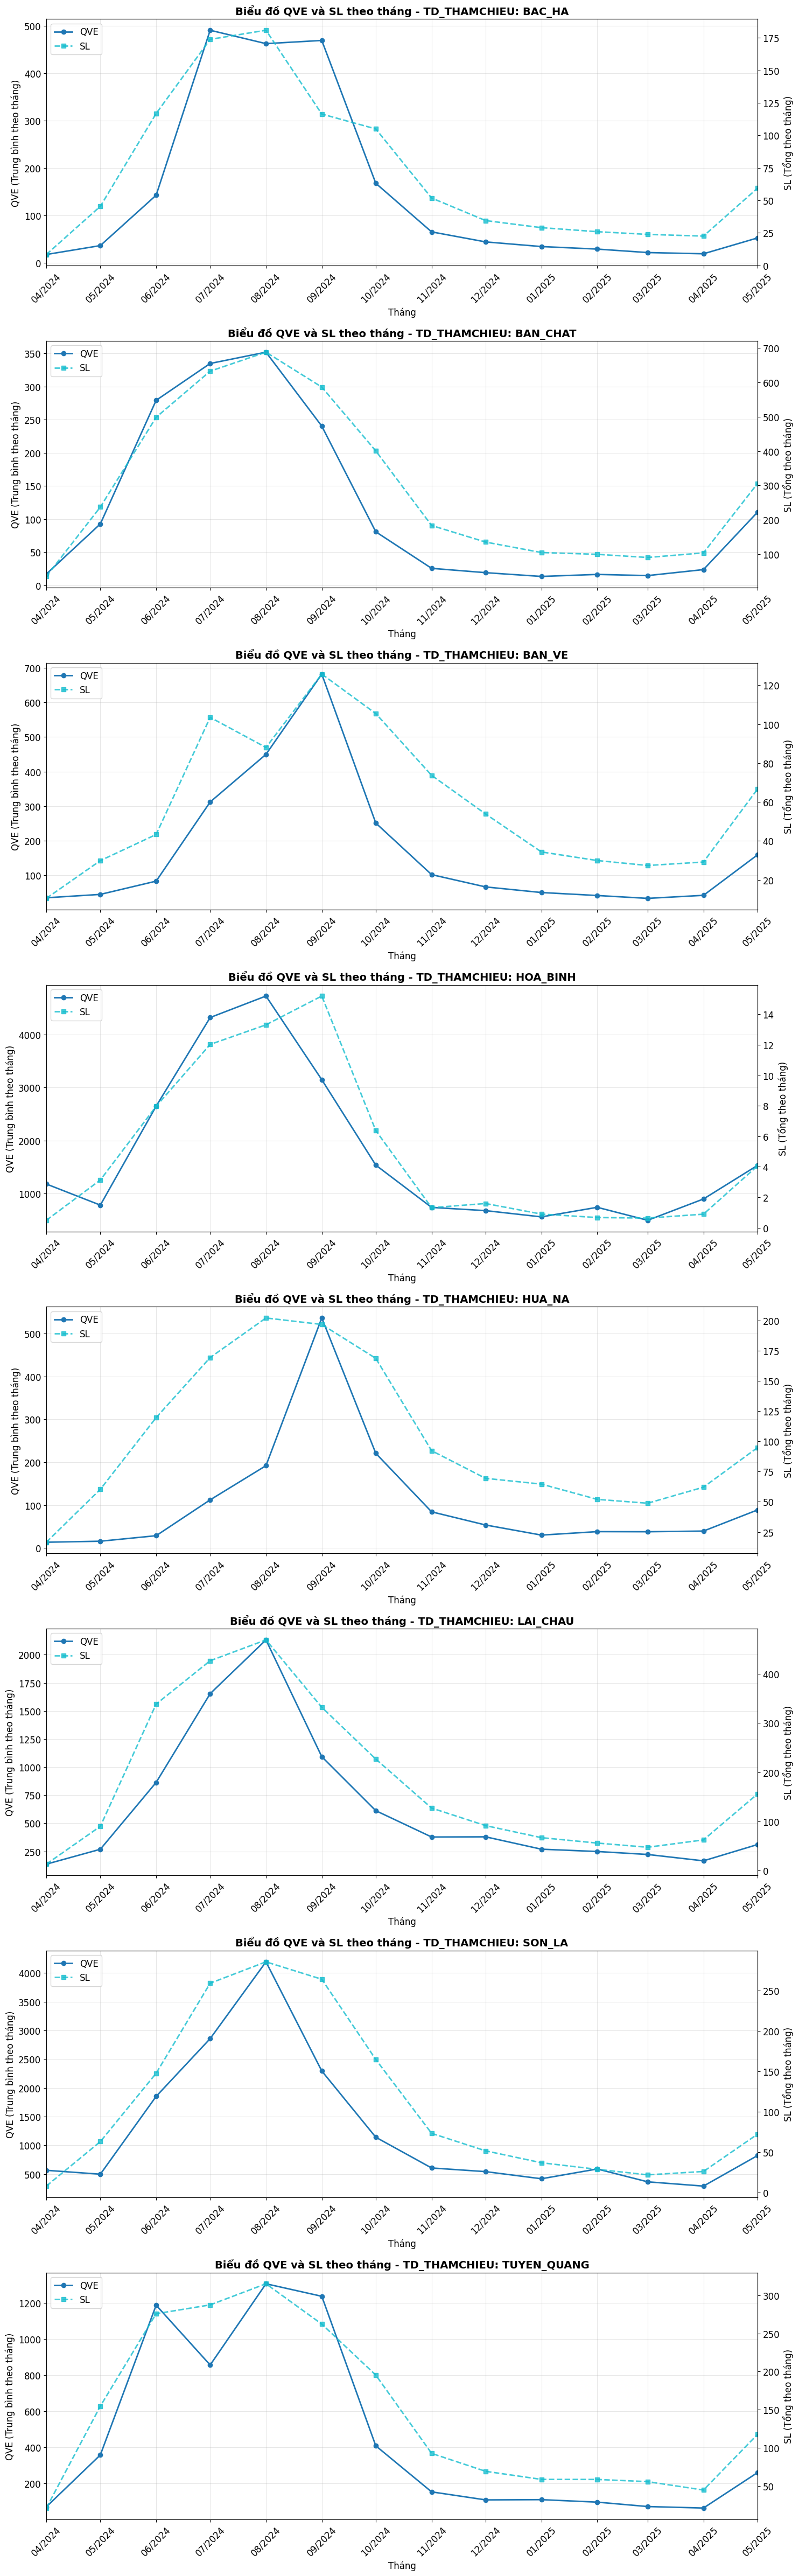


Đã vẽ biểu đồ theo tháng cho 8 giá trị TD_THAMCHIEU


In [24]:
if 'data' in locals():
    unique_td_thamchieu = data['TD_THAMCHIEU'].unique()
    print(f"Vẽ biểu đồ theo tháng cho các giá trị TD_THAMCHIEU: {unique_td_thamchieu}")
    
    n_plots = len(unique_td_thamchieu)
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            date_col = 'Ngày'
        elif 'NGAY' in subset_data.columns:
            date_col = 'NGAY'
        else:
            print(f"Không tìm thấy cột ngày cho {td_value}")
            continue
            
        subset_data[date_col] = pd.to_datetime(subset_data[date_col])
        subset_data = subset_data.sort_values(date_col)
        
        subset_data['Tháng'] = subset_data[date_col].dt.to_period('M')
        
        monthly_data = subset_data.groupby('Tháng').agg({
            'QVE': 'mean',
            'SL': 'sum'
        }).reset_index()
        
        monthly_data['Tháng'] = monthly_data['Tháng'].dt.start_time
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel('Tháng')
        ax1.set_ylabel('QVE (Trung bình theo tháng)', color='black')
        line1 = ax1.plot(monthly_data['Tháng'], monthly_data['QVE'], 
                        color=color_qve, linewidth=2, marker='o', label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL (Tổng theo tháng)', color='black')
        line2 = ax2.plot(monthly_data['Tháng'], monthly_data['SL'], 
                        color=color_sl, linewidth=2, marker='s', 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo tháng - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter, MonthLocator
        ax1.xaxis.set_major_locator(MonthLocator())
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
        
        ax1.set_xlim(monthly_data['Tháng'].min(), monthly_data['Tháng'].max())
        
        print(f"- {td_value}: {len(monthly_data)} tháng dữ liệu")
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nĐã vẽ biểu đồ theo tháng cho {n_plots} giá trị TD_THAMCHIEU")
    
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


In [14]:
import os

if 'data' in locals():
    output_dir = "bieudu_output"
    os.makedirs(output_dir, exist_ok=True)
    
    unique_td_thamchieu = data['TD_THAMCHIEU'].unique()
    
    print("Đang xuất biểu đồ theo ngày...")
    n_plots = len(unique_td_thamchieu)
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            subset_data['Ngày'] = pd.to_datetime(subset_data['Ngày'])
            subset_data = subset_data.sort_values('Ngày')
            x_axis = subset_data['Ngày']
            x_label = 'Thời gian'
        elif 'NGAY' in subset_data.columns:
            subset_data['NGAY'] = pd.to_datetime(subset_data['NGAY'])
            subset_data = subset_data.sort_values('NGAY')
            x_axis = subset_data['NGAY']
            x_label = 'Thời gian'
        else:
            x_axis = range(len(subset_data))
            x_label = 'Chỉ số'
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel(x_label)
        ax1.set_ylabel('QVE', color='black')
        line1 = ax1.plot(x_axis, subset_data['QVE'], color=color_qve, linewidth=2, label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL', color='black')
        line2 = ax2.plot(x_axis, subset_data['SL'], color=color_sl, linewidth=2, 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo thời gian - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        if 'Ngày' in subset_data.columns or 'NGAY' in subset_data.columns:
            ax1.tick_params(axis='x', rotation=45, labelcolor='black')
            
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%m/%Y')
            ax1.xaxis.set_major_formatter(date_formatter)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/bieu_do_theo_ngay.png', dpi=300, bbox_inches='tight', 
                format='png', facecolor='white', edgecolor='none')
    plt.savefig(f'{output_dir}/bieu_do_theo_ngay.pdata', dpi=300, bbox_inches='tight', 
                format='pdata', facecolor='white', edgecolor='none')
    plt.close()
    
    print("Đang xuất biểu đồ theo tuần...")
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            date_col = 'Ngày'
        elif 'NGAY' in subset_data.columns:
            date_col = 'NGAY'
        else:
            continue
            
        subset_data[date_col] = pd.to_datetime(subset_data[date_col])
        subset_data = subset_data.sort_values(date_col)
        
        subset_data['Tuần'] = subset_data[date_col].dt.to_period('W')
        
        weekly_data = subset_data.groupby('Tuần').agg({
            'QVE': 'mean',
            'SL': 'sum'
        }).reset_index()
        
        weekly_data['Tuần'] = weekly_data['Tuần'].dt.start_time
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel('Tuần')
        ax1.set_ylabel('QVE (Trung bình theo tuần)', color='black')
        line1 = ax1.plot(weekly_data['Tuần'], weekly_data['QVE'], 
                        color=color_qve, linewidth=2, marker='o', label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL (Tổng theo tuần)', color='black')
        line2 = ax2.plot(weekly_data['Tuần'], weekly_data['SL'], 
                        color=color_sl, linewidth=2, marker='s', 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo tuần - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/bieu_do_theo_tuan.png', dpi=300, bbox_inches='tight', 
                format='png', facecolor='white', edgecolor='none')
    plt.savefig(f'{output_dir}/bieu_do_theo_tuan.pdata', dpi=300, bbox_inches='tight', 
                format='pdata', facecolor='white', edgecolor='none')
    plt.close()
    
    print("Đang xuất biểu đồ theo tháng...")
    fig, axes = plt.subplots(n_plots, 1, figsize=(15, 6*n_plots))
    
    if n_plots == 1:
        axes = [axes]
    
    for i, td_value in enumerate(unique_td_thamchieu):
        subset_data = data[data['TD_THAMCHIEU'] == td_value].copy()
        
        if 'Ngày' in subset_data.columns:
            date_col = 'Ngày'
        elif 'NGAY' in subset_data.columns:
            date_col = 'NGAY'
        else:
            continue
            
        subset_data[date_col] = pd.to_datetime(subset_data[date_col])
        subset_data = subset_data.sort_values(date_col)
        
        subset_data['Tháng'] = subset_data[date_col].dt.to_period('M')
        
        monthly_data = subset_data.groupby('Tháng').agg({
            'QVE': 'mean',
            'SL': 'sum'
        }).reset_index()
        
        monthly_data['Tháng'] = monthly_data['Tháng'].dt.start_time
        
        ax1 = axes[i]
        
        color_qve = 'tab:blue'
        ax1.set_xlabel('Tháng')
        ax1.set_ylabel('QVE (Trung bình theo tháng)', color='black')
        line1 = ax1.plot(monthly_data['Tháng'], monthly_data['QVE'], 
                        color=color_qve, linewidth=2, marker='o', label='QVE')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.grid(True, alpha=0.3)
        
        ax2 = ax1.twinx()
        color_sl = 'tab:cyan'
        ax2.set_ylabel('SL (Tổng theo tháng)', color='black')
        line2 = ax2.plot(monthly_data['Tháng'], monthly_data['SL'], 
                        color=color_sl, linewidth=2, marker='s', 
                        linestyle='--', label='SL', alpha=0.8)
        ax2.tick_params(axis='y', labelcolor='black')
        
        ax1.set_title(f'Biểu đồ QVE và SL theo tháng - TD_THAMCHIEU: {td_value}', 
                     fontsize=14, fontweight='bold')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        ax1.tick_params(axis='x', rotation=45, labelcolor='black')
        
        from matplotlib.dates import DateFormatter, MonthLocator
        ax1.xaxis.set_major_locator(MonthLocator())
        date_formatter = DateFormatter('%m/%Y')
        ax1.xaxis.set_major_formatter(date_formatter)
        
        ax1.set_xlim(monthly_data['Tháng'].min(), monthly_data['Tháng'].max())
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/bieu_do_theo_thang.png', dpi=300, bbox_inches='tight', 
                format='png', facecolor='white', edgecolor='none')
    plt.savefig(f'{output_dir}/bieu_do_theo_thang.pdata', dpi=300, bbox_inches='tight', 
                format='pdata', facecolor='white', edgecolor='none')
    plt.close()
    
    print("\n✅ Hoàn thành xuất biểu đồ!")
    print(f"Các file đã được lưu trong thư mục: {output_dir}/")
    print("📁 Danh sách file:")
    print("   📊 bieu_do_theo_ngay.png (300 DPI)")
    print("   📊 bieu_do_theo_ngay.pdata (Vector)")
    print("   📊 bieu_do_theo_tuan.png (300 DPI)")
    print("   📊 bieu_do_theo_tuan.pdata (Vector)")
    print("   📊 bieu_do_theo_thang.png (300 DPI)")
    print("   📊 bieu_do_theo_thang.pdata (Vector)")
    
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


Đang xuất biểu đồ theo ngày...
Đang xuất biểu đồ theo tuần...
Đang xuất biểu đồ theo tháng...

✅ Hoàn thành xuất biểu đồ!
Các file đã được lưu trong thư mục: bieudu_output/
📁 Danh sách file:
   📊 bieu_do_theo_ngay.png (300 DPI)
   📊 bieu_do_theo_ngay.pdf (Vector)
   📊 bieu_do_theo_tuan.png (300 DPI)
   📊 bieu_do_theo_tuan.pdf (Vector)
   📊 bieu_do_theo_thang.png (300 DPI)
   📊 bieu_do_theo_thang.pdf (Vector)


Lọc dữ liệu tháng 9/2024...
✅ Tìm thấy dữ liệu tháng 9/2024 cho: ['BAC_HA' 'BAN_CHAT' 'BAN_VE' 'HOA_BINH' 'HUA_NA' 'LAI_CHAU' 'SON_LA'
 'TUYEN_QUANG']
Tổng số ngày: 240
Khoảng thời gian: 01/09/2024 - 30/09/2024
- BAC_HA: 30 ngày, tương quan QVE-SL = -0.561
- BAN_CHAT: 30 ngày, tương quan QVE-SL = -0.206
- BAN_VE: 30 ngày, tương quan QVE-SL = 0.237
- HOA_BINH: 30 ngày, tương quan QVE-SL = -0.177
- HUA_NA: 30 ngày, tương quan QVE-SL = -0.349
- LAI_CHAU: 30 ngày, tương quan QVE-SL = 0.772
- SON_LA: 30 ngày, tương quan QVE-SL = -0.156
- TUYEN_QUANG: 30 ngày, tương quan QVE-SL = -0.813


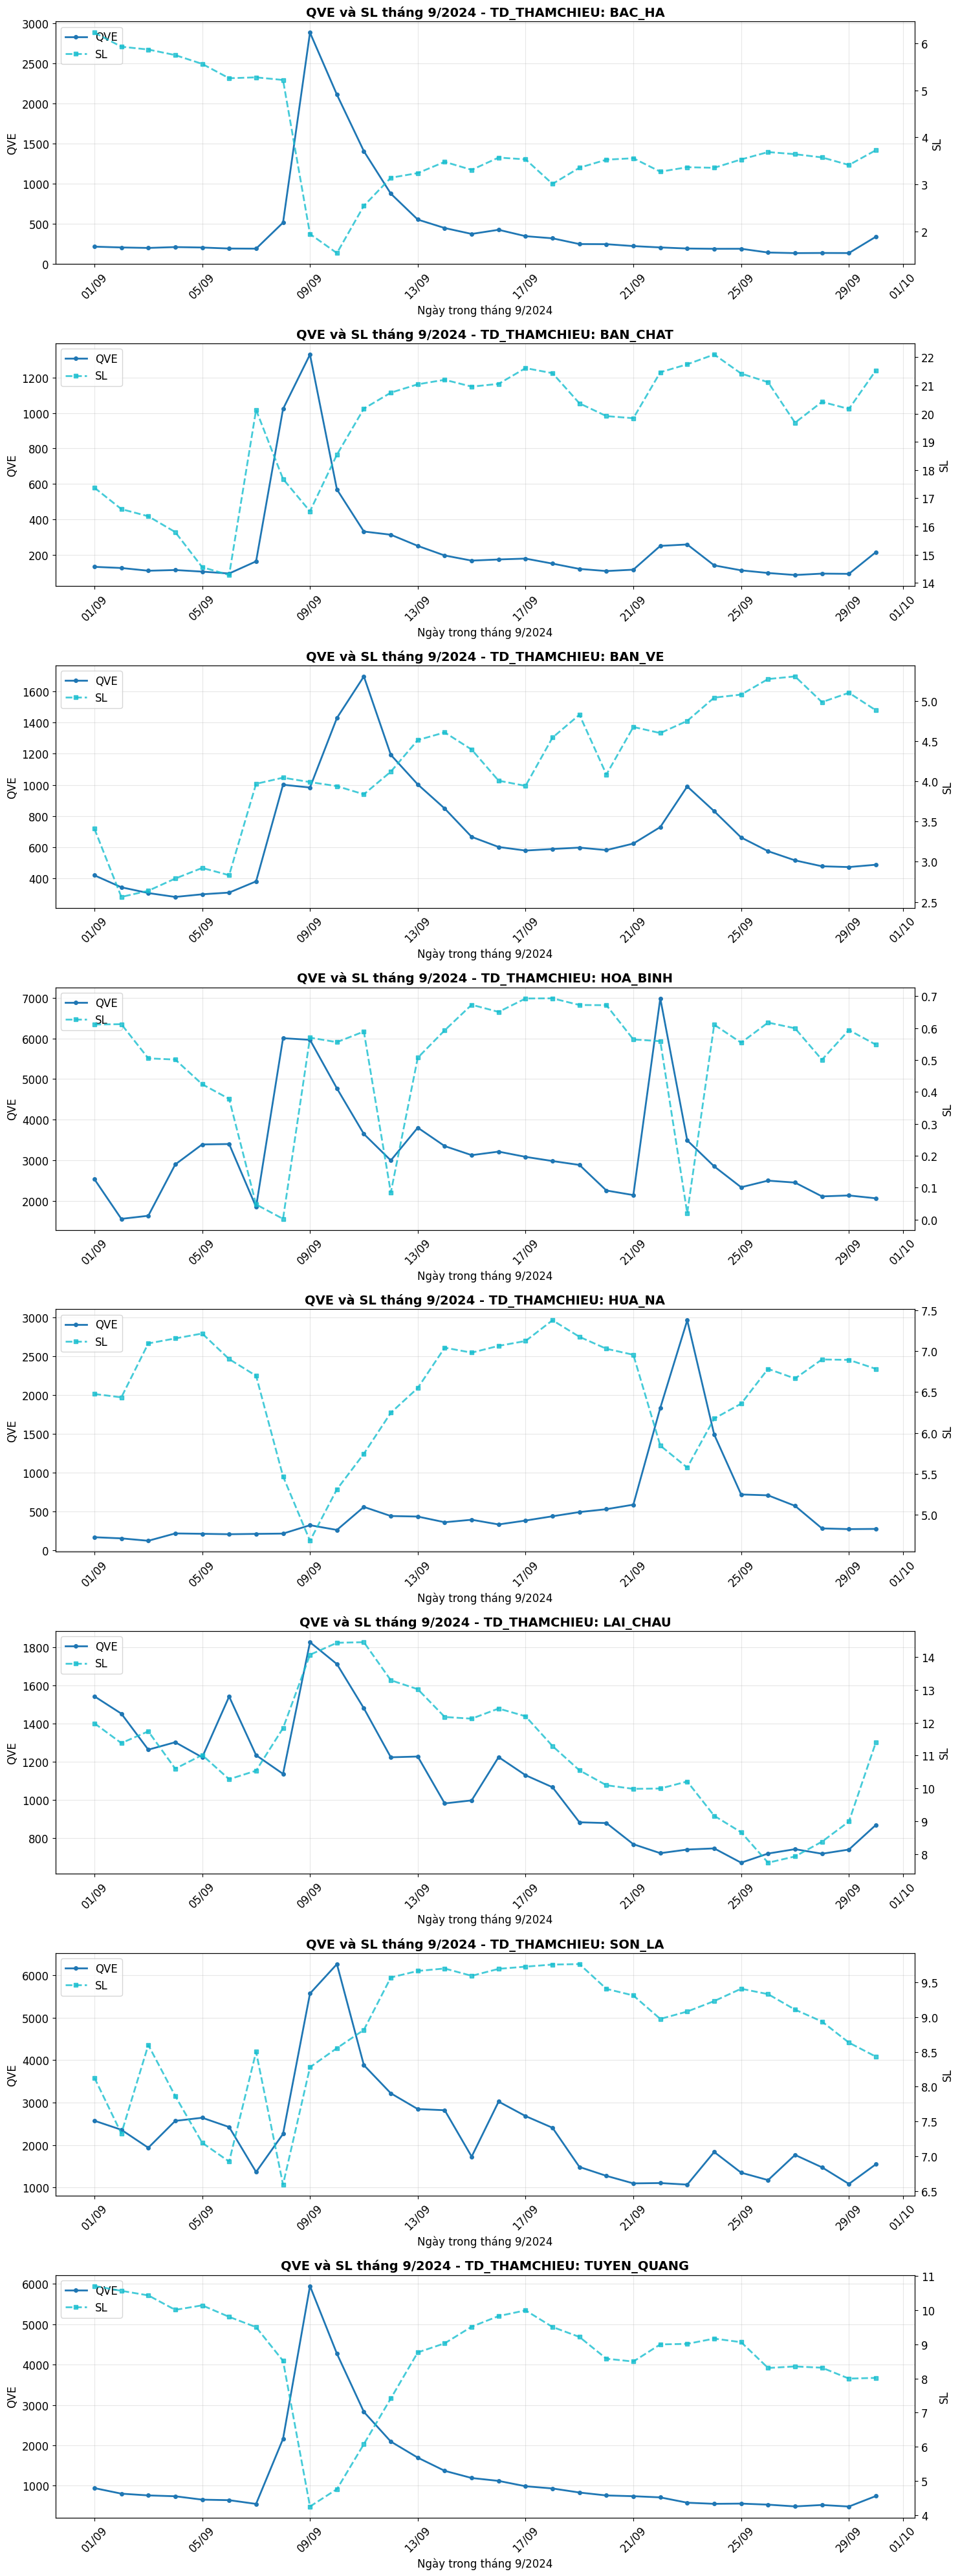


📊 Đã vẽ biểu đồ tháng 9/2024 cho 8 nhà máy
🔍 Chú ý: Dữ liệu ngắn hạn (1 tháng) có thể có biến động cao


In [15]:
if 'data' in locals():
    print("Lọc dữ liệu tháng 9/2024...")
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    
    sept_2024_data = data_copy[
        (data_copy[date_col].dt.year == 2024) & 
        (data_copy[date_col].dt.month == 9)
    ]
    
    if sept_2024_data.empty:
        print("❌ Không có dữ liệu cho tháng 9/2024!")
        print("Các năm có sẵn trong dữ liệu:")
        print(data_copy[date_col].dt.year.unique())
        print("Các tháng có sẵn trong dữ liệu:")
        print(data_copy[date_col].dt.month.unique())
    else:
        unique_td_thamchieu = sept_2024_data['TD_THAMCHIEU'].unique()
        print(f"✅ Tìm thấy dữ liệu tháng 9/2024 cho: {unique_td_thamchieu}")
        print(f"Tổng số ngày: {len(sept_2024_data)}")
        print(f"Khoảng thời gian: {sept_2024_data[date_col].min().strftime('%d/%m/%Y')} - {sept_2024_data[date_col].max().strftime('%d/%m/%Y')}")
        
        n_plots = len(unique_td_thamchieu)
        fig, axes = plt.subplots(n_plots, 1, figsize=(15, 5*n_plots))
        
        if n_plots == 1:
            axes = [axes]
        
        for i, td_value in enumerate(unique_td_thamchieu):
            subset_data = sept_2024_data[sept_2024_data['TD_THAMCHIEU'] == td_value].copy()
            subset_data = subset_data.sort_values(date_col)
            
            ax1 = axes[i] if n_plots > 1 else axes[0]
            
            color_qve = 'tab:blue'
            ax1.set_xlabel('Ngày trong tháng 9/2024')
            ax1.set_ylabel('QVE', color='black')
            line1 = ax1.plot(subset_data[date_col], subset_data['QVE'], 
                            color=color_qve, linewidth=2, marker='o', markersize=4, label='QVE')
            ax1.tick_params(axis='y', labelcolor='black')
            ax1.grid(True, alpha=0.3)
            
            ax2 = ax1.twinx()
            color_sl = 'tab:cyan'
            ax2.set_ylabel('SL', color='black')
            line2 = ax2.plot(subset_data[date_col], subset_data['SL'], 
                            color=color_sl, linewidth=2, marker='s', markersize=4,
                            linestyle='--', label='SL', alpha=0.8)
            ax2.tick_params(axis='y', labelcolor='black')
            
            ax1.set_title(f'QVE và SL tháng 9/2024 - TD_THAMCHIEU: {td_value}', 
                         fontsize=14, fontweight='bold')
            
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
            
            ax1.tick_params(axis='x', rotation=45, labelcolor='black')
            
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%d/%m')
            ax1.xaxis.set_major_formatter(date_formatter)
            
            correlation = subset_data['QVE'].corr(subset_data['SL'])
            print(f"- {td_value}: {len(subset_data)} ngày, tương quan QVE-SL = {correlation:.3f}")
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n📊 Đã vẽ biểu đồ tháng 9/2024 cho {len(unique_td_thamchieu)} nhà máy")
        print("🔍 Chú ý: Dữ liệu ngắn hạn (1 tháng) có thể có biến động cao")
        
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


In [16]:
import os

if 'data' in locals():
    print("Xuất biểu đồ tháng 9/2024 ra ảnh chất lượng cao...")
    
    output_dir = "bieudu_output"
    os.makedirs(output_dir, exist_ok=True)
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    
    sept_2024_data = data_copy[
        (data_copy[date_col].dt.year == 2024) & 
        (data_copy[date_col].dt.month == 9)
    ]
    
    if sept_2024_data.empty:
        print("❌ Không có dữ liệu cho tháng 9/2024!")
        print("Không thể xuất biểu đồ.")
    else:
        unique_td_thamchieu = sept_2024_data['TD_THAMCHIEU'].unique()
        print(f"Đang xuất biểu đồ cho {len(unique_td_thamchieu)} nhà máy...")
        
        n_plots = len(unique_td_thamchieu)
        fig, axes = plt.subplots(n_plots, 1, figsize=(15, 5*n_plots))
        
        if n_plots == 1:
            axes = [axes]
        
        for i, td_value in enumerate(unique_td_thamchieu):
            subset_data = sept_2024_data[sept_2024_data['TD_THAMCHIEU'] == td_value].copy()
            subset_data = subset_data.sort_values(date_col)
            
            ax1 = axes[i] if n_plots > 1 else axes[0]
            
            color_qve = 'tab:blue'
            ax1.set_xlabel('Ngày trong tháng 9/2024')
            ax1.set_ylabel('QVE', color='black')
            line1 = ax1.plot(subset_data[date_col], subset_data['QVE'], 
                            color=color_qve, linewidth=2, marker='o', markersize=4, label='QVE')
            ax1.tick_params(axis='y', labelcolor='black')
            ax1.grid(True, alpha=0.3)
            
            ax2 = ax1.twinx()
            color_sl = 'tab:cyan'
            ax2.set_ylabel('SL', color='black')
            line2 = ax2.plot(subset_data[date_col], subset_data['SL'], 
                            color=color_sl, linewidth=2, marker='s', markersize=4,
                            linestyle='--', label='SL', alpha=0.8)
            ax2.tick_params(axis='y', labelcolor='black')
            
            ax1.set_title(f'QVE và SL tháng 9/2024 - TD_THAMCHIEU: {td_value}', 
                         fontsize=14, fontweight='bold')
            
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
            
            ax1.tick_params(axis='x', rotation=45, labelcolor='black')
            
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%d/%m')
            ax1.xaxis.set_major_formatter(date_formatter)
            
            correlation = subset_data['QVE'].corr(subset_data['SL'])
            print(f"- {td_value}: {len(subset_data)} ngày, tương quan = {correlation:.3f}")
        
        plt.tight_layout()
        
        plt.savefig(f'{output_dir}/bieu_do_thang_09_2024.png', dpi=300, bbox_inches='tight', 
                    format='png', facecolor='white', edgecolor='none')
        plt.savefig(f'{output_dir}/bieu_do_thang_09_2024.pdata', dpi=300, bbox_inches='tight', 
                    format='pdata', facecolor='white', edgecolor='none')
        
        plt.close()
        
        print("\n✅ Hoàn thành xuất biểu đồ tháng 9/2024!")
        print(f"Các file đã được lưu trong thư mục: {output_dir}/")
        print("📁 Danh sách file:")
        print("   📊 bieu_do_thang_09_2024.png (300 DPI)")
        print("   📊 bieu_do_thang_09_2024.pdata (Vector)")
        print(f"\n📄 Đường dẫn đầy đủ:")
        print(f"   PNG: {os.path.abspath(f'{output_dir}/bieu_do_thang_09_2024.png')}")
        print(f"   Pdata: {os.path.abspath(f'{output_dir}/bieu_do_thang_09_2024.pdata')}")
        
        file_size_png = os.path.getsize(f'{output_dir}/bieu_do_thang_09_2024.png') / 1024 / 1024
        file_size_pdata = os.path.getsize(f'{output_dir}/bieu_do_thang_09_2024.pdata') / 1024 / 1024
        print(f"\n📦 Kích thước file:")
        print(f"   PNG: {file_size_png:.2f} MB")
        print(f"   Pdata: {file_size_pdata:.2f} MB")
        
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


Xuất biểu đồ tháng 9/2024 ra ảnh chất lượng cao...
Đang xuất biểu đồ cho 8 nhà máy...
- BAC_HA: 30 ngày, tương quan = -0.561
- BAN_CHAT: 30 ngày, tương quan = -0.206
- BAN_VE: 30 ngày, tương quan = 0.237
- HOA_BINH: 30 ngày, tương quan = -0.177
- HUA_NA: 30 ngày, tương quan = -0.349
- LAI_CHAU: 30 ngày, tương quan = 0.772
- SON_LA: 30 ngày, tương quan = -0.156
- TUYEN_QUANG: 30 ngày, tương quan = -0.813

✅ Hoàn thành xuất biểu đồ tháng 9/2024!
Các file đã được lưu trong thư mục: bieudu_output/
📁 Danh sách file:
   📊 bieu_do_thang_09_2024.png (300 DPI)
   📊 bieu_do_thang_09_2024.pdf (Vector)

📄 Đường dẫn đầy đủ:
   PNG: d:\Khuê\Khue\TDN\notebooks\bieudu_output\bieu_do_thang_09_2024.png
   PDF: d:\Khuê\Khue\TDN\notebooks\bieudu_output\bieu_do_thang_09_2024.pdf

📦 Kích thước file:
   PNG: 2.41 MB
   PDF: 0.04 MB


In [20]:
try:
    from docx import Document
    from docx.shared import Inches, Pt
    from docx.enum.text import WD_ALIGN_PARAGRAPH
    print("✅ Thư viện python-docx đã có sẵn")
except ImportError:
    print("❌ Chưa có thư viện python-docx. Đang cài đặt...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "python-docx"])
    from docx import Document
    from docx.shared import Inches, Pt
    from docx.enum.text import WD_ALIGN_PARAGRAPH
    print("✅ Đã cài đặt thành công python-docx")

import os
import tempfile
import time

if 'data' in locals():
    print("Tạo file Word chứa biểu đồ tháng 9/2024...")
    
    output_dir = "bieudu_output"
    os.makedirs(output_dir, exist_ok=True)
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    
    sept_2024_data = data_copy[
        (data_copy[date_col].dt.year == 2024) & 
        (data_copy[date_col].dt.month == 9)
    ]
    
    if sept_2024_data.empty:
        print("❌ Không có dữ liệu cho tháng 9/2024!")
        print("Không thể tạo file Word.")
    else:
        doc = Document()
        
        title = doc.add_heading('BÁO CÁO PHÂN TÍCH QVE VÀ SL THÁNG 9/2024', 0)
        title.alignment = WD_ALIGN_PARAGRAPH.CENTER
        
        doc.add_paragraph()
        intro = doc.add_paragraph('Báo cáo phân tích mối tương quan giữa QVE (Quá trình vận hành) và SL (Sản lượng) của các nhà máy thủy điện trong tháng 9/2024.')
        intro.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
        
        doc.add_paragraph()
        
        unique_td_thamchieu = sept_2024_data['TD_THAMCHIEU'].unique()
        
        summary_table = doc.add_table(rows=1, cols=4)
        summary_table.style = 'Table Grid'
        
        hdr_cells = summary_table.rows[0].cells
        hdr_cells[0].text = 'Nhà máy'
        hdr_cells[1].text = 'Số ngày'
        hdr_cells[2].text = 'Tương quan QVE-SL'
        hdr_cells[3].text = 'Đánh giá'
        
        correlations = {}
        
        temp_files = []
        
        for td_value in unique_td_thamchieu:
            subset_data = sept_2024_data[sept_2024_data['TD_THAMCHIEU'] == td_value].copy()
            subset_data = subset_data.sort_values(date_col)
            
            tmp_file = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
            temp_files.append(tmp_file.name)
            tmp_file.close()
            
            fig, ax1 = plt.subplots(figsize=(12, 6))
            
            color_qve = 'tab:blue'
            ax1.set_xlabel('Ngày trong tháng 9/2024', fontsize=12)
            ax1.set_ylabel('QVE', color='black', fontsize=12)
            line1 = ax1.plot(subset_data[date_col], subset_data['QVE'], 
                            color=color_qve, linewidth=2, marker='o', markersize=4, label='QVE')
            ax1.tick_params(axis='y', labelcolor='black')
            ax1.grid(True, alpha=0.3)
            
            ax2 = ax1.twinx()
            color_sl = 'tab:cyan'
            ax2.set_ylabel('SL', color='black', fontsize=12)
            line2 = ax2.plot(subset_data[date_col], subset_data['SL'], 
                            color=color_sl, linewidth=2, marker='s', markersize=4,
                            linestyle='--', label='SL', alpha=0.8)
            ax2.tick_params(axis='y', labelcolor='black')
            
            ax1.set_title(f'Biểu đồ QVE và SL tháng 9/2024 - {td_value}', 
                         fontsize=14, fontweight='bold')
            
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
            
            ax1.tick_params(axis='x', rotation=45, labelcolor='black')
            
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%d/%m')
            ax1.xaxis.set_major_formatter(date_formatter)
            
            plt.tight_layout()
            plt.savefig(tmp_file.name, dpi=300, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
            plt.close(fig)
            plt.clf()
            
            time.sleep(0.1)
            
            correlation = subset_data['QVE'].corr(subset_data['SL'])
            correlations[td_value] = correlation
            
            doc.add_heading(f'{td_value}', level=1)
            
            doc.add_picture(tmp_file.name, width=Inches(6))
            
            stats_para = doc.add_paragraph()
            stats_para.add_run('Thống kê: ').bold = True
            stats_para.add_run(f'Số ngày có dữ liệu: {len(subset_data)}, ')
            stats_para.add_run(f'Hệ số tương quan QVE-SL: {correlation:.3f}')
            
            if correlation > 0.8:
                assessment = "Tương quan rất cao - Vận hành hiệu quả"
            elif correlation > 0.6:
                assessment = "Tương quan cao - Vận hành tốt"
            elif correlation > 0.4:
                assessment = "Tương quan trung bình - Cần cải thiện"
            else:
                assessment = "Tương quan thấp - Cần kiểm tra vận hành"
            
            assess_para = doc.add_paragraph()
            assess_para.add_run('Đánh giá: ').bold = True
            assess_para.add_run(assessment)
            
            doc.add_paragraph()
            
            row_cells = summary_table.add_row().cells
            row_cells[0].text = td_value
            row_cells[1].text = str(len(subset_data))
            row_cells[2].text = f'{correlation:.3f}'
            row_cells[3].text = assessment.split(' - ')[0]
            
            print(f"✅ Đã thêm {td_value} vào Word document")
        
        summary_heading = doc.paragraphs[2]
        summary_heading.clear()
        summary_heading.add_run('BẢNG TÓNG KẾT').bold = True
        summary_heading.alignment = WD_ALIGN_PARAGRAPH.CENTER
        
        doc.add_paragraph()
        conclusion = doc.add_heading('KẾT LUẬN', level=1)
        
        best_corr = max(correlations.values())
        worst_corr = min(correlations.values())
        best_plant = [k for k, v in correlations.items() if v == best_corr][0]
        worst_plant = [k for k, v in correlations.items() if v == worst_corr][0]
        
        doc.add_paragraph(f'• Nhà máy có tương quan cao nhất: {best_plant} ({best_corr:.3f})')
        doc.add_paragraph(f'• Nhà máy cần cải thiện: {worst_plant} ({worst_corr:.3f})')
        doc.add_paragraph(f'• Trung bình tương quan toàn hệ thống: {np.mean(list(correlations.values())):.3f}')
        
        footer = doc.add_paragraph()
        footer.add_run(f'Báo cáo được tạo tự động vào {pd.Timestamp.now().strftime("%d/%m/%Y %H:%M:%S")}').italic = True
        footer.alignment = WD_ALIGN_PARAGRAPH.RIGHT
        
        docx_path = f'{output_dir}/bao_cao_QVE_SL_thang_09_2024.docx'
        doc.save(docx_path)
        
        print("\n🧹 Dọn dẹp temporary files...")
        for temp_file in temp_files:
            try:
                time.sleep(0.1)
                os.unlink(temp_file)
                print(f"   ✅ Đã xóa {temp_file}")
            except OSError as e:
                print(f"   ⚠️ Không thể xóa {temp_file}: {e}")
        
        print("\n✅ Hoàn thành tạo file Word!")
        print(f"📄 File đã được lưu: {docx_path}")
        print(f"📊 Bao gồm {len(unique_td_thamchieu)} biểu đồ và bảng tổng kết")
        print(f"📁 Đường dẫn đầy đủ: {os.path.abspath(docx_path)}")
        
        file_size = os.path.getsize(docx_path) / 1024 / 1024
        print(f"📦 Kích thước file: {file_size:.2f} MB")
        
else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")


✅ Thư viện python-docx đã có sẵn
Tạo file Word chứa biểu đồ tháng 9/2024...
✅ Đã thêm BAC_HA vào Word document
✅ Đã thêm BAN_CHAT vào Word document
✅ Đã thêm BAN_VE vào Word document
✅ Đã thêm HOA_BINH vào Word document
✅ Đã thêm HUA_NA vào Word document
✅ Đã thêm LAI_CHAU vào Word document
✅ Đã thêm SON_LA vào Word document
✅ Đã thêm TUYEN_QUANG vào Word document

🧹 Dọn dẹp temporary files...
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmpkrqn3lzg.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmpz5834582.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmp2mtqlrux.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmpqwr44t7o.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmp8x43iucc.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmpkt1ym3ob.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmpx7caely1.png
   ✅ Đã xóa C:\Users\khuenm\AppData\Local\Temp\tmp6zp7eoi5.png

✅ Hoàn thành tạo file Word!
📄 File đã được lưu: bieudu_output/bao_cao_QVE_SL_thang_09_2024.docx
📊 

<Figure size 1200x800 with 0 Axes>

In [ ]:
if 'data' in locals():
    print("📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO NGÀY")
    print("=" * 60)
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    data_copy = data_copy.sort_values(date_col)
    
    unique_td_thamchieu = data_copy['TD_THAMCHIEU'].unique()
    
    def interpret_correlation(corr_value, method_name):
        """Đánh giá mức độ tương quan theo từng phương pháp"""
        abs_corr = abs(corr_value)
        if abs_corr >= 0.9:
            return "Rất mạnh (Excellent)"
        elif abs_corr >= 0.7:
            return "Mạnh (Strong)"
        elif abs_corr >= 0.5:
            return "Trung bình (Moderate)"
        elif abs_corr >= 0.3:
            return "Yếu (Weak)"
        else:
            return "Rất yếu (Very weak)"
    
    def calculate_lag_correlation(x, y, max_lag=7):
        """Tính tương quan với độ trễ để tìm lag tối ưu"""
        best_lag = 0
        best_corr = 0
        lag_results = {}
        
        for lag in range(-max_lag, max_lag + 1):
            if lag == 0:
                corr = x.corr(y)
            elif lag > 0:
                # QVE dẫn trước SL
                x_shifted = x[:-lag]
                y_shifted = y[lag:]
                if len(x_shifted) > 5:  # Đảm bảo đủ dữ liệu
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            else:
                # SL dẫn trước QVE
                lag = abs(lag)
                x_shifted = x[lag:]
                y_shifted = y[:-lag]
                if len(x_shifted) > 5:
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            
            lag_results[lag if lag >= 0 else lag] = corr
            if abs(corr) > abs(best_corr):
                best_corr = corr
                best_lag = lag if lag >= 0 else lag
        
        return best_lag, best_corr, lag_results
    
    # Tạo DataFrame tổng kết
    summary_data = []
    
    for td_value in unique_td_thamchieu:
        subset_data = data_copy[data_copy['TD_THAMCHIEU'] == td_value].copy()
        subset_data = subset_data.sort_values(date_col).reset_index(drop=True)
        
        if len(subset_data) < 10:
            print(f"⚠️ {td_value}: Không đủ dữ liệu (chỉ có {len(subset_data)} ngày)")
            continue
        
        qve_data = subset_data['QVE'].dropna()
        sl_data = subset_data['SL'].dropna()
        
        # Đảm bảo cùng index
        common_idx = qve_data.index.intersection(sl_data.index)
        qve_clean = qve_data.loc[common_idx]
        sl_clean = sl_data.loc[common_idx]
        
        if len(qve_clean) < 5:
            print(f"⚠️ {td_value}: Không đủ dữ liệu sau khi xử lý NaN")
            continue
        
        print(f"\n🏭 {td_value} (Số ngày: {len(qve_clean)})")
        print("-" * 50)
        
        # 1. Pearson Correlation (tuyến tính)
        pearson = qve_clean.corr(sl_clean, method='pearson')
        print(f"📈 Pearson (Tuyến tính):     {pearson:6.3f} - {interpret_correlation(pearson, 'Pearson')}")
        
        # 2. Spearman Correlation (đơn điệu)
        spearman = qve_clean.corr(sl_clean, method='spearman')
        print(f"📊 Spearman (Đơn điệu):      {spearman:6.3f} - {interpret_correlation(spearman, 'Spearman')}")
        
        # 3. Kendall Correlation (concordance)
        kendall = qve_clean.corr(sl_clean, method='kendall')
        print(f"🔄 Kendall (Concordance):    {kendall:6.3f} - {interpret_correlation(kendall, 'Kendall')}")
        
        # 4. Lag Correlation Analysis
        best_lag, best_corr, lag_results = calculate_lag_correlation(qve_clean, sl_clean, max_lag=7)
        
        if best_lag == 0:
            lag_desc = "Đồng thời (No lag)"
        elif best_lag > 0:
            lag_desc = f"QVE dẫn trước {best_lag} ngày"
        else:
            lag_desc = f"SL dẫn trước {abs(best_lag)} ngày"
        
        print(f"⏱️ Lag tối ưu:              {best_lag:6d} - {lag_desc}")
        print(f"📊 Tương quan lag tối ưu:   {best_corr:6.3f} - {interpret_correlation(best_corr, 'Lag')}")
        
        # Phân tích sự khác biệt
        diff_sp_pe = abs(spearman - pearson)
        if diff_sp_pe > 0.1:
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Có xu hướng phi tuyến)")
        
        # Tổng kết cho bảng
        summary_data.append({
            'Nhà máy': td_value,
            'Số ngày': len(qve_clean),
            'Pearson': pearson,
            'Spearman': spearman,
            'Kendall': kendall,
            'Best Lag': best_lag,
            'Lag Corr': best_corr,
            'Đánh giá chung': interpret_correlation(max(abs(pearson), abs(spearman), abs(best_corr)), 'Overall')
        })
    
    print("\n" + "=" * 80)
    print("📋 BẢNG TỔNG KẾT TƯƠNG QUAN")
    print("=" * 80)
    
    summary_data = pd.DataFrame(summary_data)
    if not summary_data.empty:
        print(summary_data.to_string(index=False, float_format='%.3f'))
        
        print(f"\n📊 THỐNG KÊ TỔNG THỂ:")
        print(f"   • Pearson trung bình:  {summary_data['Pearson'].mean():.3f}")
        print(f"   • Spearman trung bình: {summary_data['Spearman'].mean():.3f}")
        print(f"   • Kendall trung bình:  {summary_data['Kendall'].mean():.3f}")
        
        # Phân tích lag patterns
        lag_counts = summary_data['Best Lag'].value_counts().sort_index()
        print(f"\n⏱️ PHÂN TÍCH LAG PATTERNS:")
        for lag, count in lag_counts.items():
            if lag == 0:
                print(f"   • Lag {lag:2d} (Đồng thời):     {count} nhà máy")
            elif lag > 0:
                print(f"   • Lag +{lag} (QVE dẫn trước): {count} nhà máy")
            else:
                print(f"   • Lag {lag:2d} (SL dẫn trước):  {count} nhà máy")
        
        # Khuyến nghị
        print(f"\n💡 KHUYẾN NGHỊ:")
        
        # Nhà máy tốt nhất và cần cải thiện
        best_overall = summary_data.loc[summary_data['Lag Corr'].idxmax()]
        worst_overall = summary_data.loc[summary_data['Lag Corr'].idxmin()]
        
        print(f"   🏆 Tương quan tốt nhất: {best_overall['Nhà máy']} (Lag corr: {best_overall['Lag Corr']:.3f})")
        print(f"   ⚠️ Cần cải thiện:      {worst_overall['Nhà máy']} (Lag corr: {worst_overall['Lag Corr']:.3f})")
        
        # Phân tích xu hướng phi tuyến
        nonlinear_plants = summary_data[abs(summary_data['Spearman'] - summary_data['Pearson']) > 0.1]
        if not nonlinear_plants.empty:
            print(f"   🔄 Có xu hướng phi tuyến: {', '.join(nonlinear_plants['Nhà máy'].tolist())}")
        
        # Phân tích lag patterns
        if (summary_data['Best Lag'] != 0).any():
            lag_plants = summary_data[summary_data['Best Lag'] != 0]
            print(f"   ⏰ Có độ trễ đáng kể: {len(lag_plants)} nhà máy")
    
    else:
        print("❌ Không có dữ liệu đủ để phân tích!")

else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")

📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO NGÀY

🏭 BAC_HA (Số ngày: 409)
--------------------------------------------------
📈 Pearson (Tuyến tính):      0.525 - Trung bình (Moderate)
📊 Spearman (Đơn điệu):       0.891 - Mạnh (Strong)
🔄 Kendall (Concordance):     0.704 - Mạnh (Strong)
⏱️ Lag tối ưu:                   0 - Đồng thời (No lag)
📊 Tương quan lag tối ưu:    0.525 - Trung bình (Moderate)
🔍 Chênh lệch Spearman-Pearson: 0.366 (Có xu hướng phi tuyến)

🏭 TUYEN_QUANG (Số ngày: 409)
--------------------------------------------------
📈 Pearson (Tuyến tính):      0.651 - Trung bình (Moderate)
📊 Spearman (Đơn điệu):       0.905 - Rất mạnh (Excellent)
🔄 Kendall (Concordance):     0.724 - Mạnh (Strong)
⏱️ Lag tối ưu:                   0 - Đồng thời (No lag)
📊 Tương quan lag tối ưu:    0.651 - Trung bình (Moderate)
🔍 Chênh lệch Spearman-Pearson: 0.254 (Có xu hướng phi tuyến)

🏭 SON_LA (Số ngày: 409)
--------------------------------------------------
📈 Pearson (Tuyến tính):      0.79

In [23]:
if 'data' in locals():
    print("📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO TUẦN")
    print("=" * 65)
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    data_copy = data_copy.sort_values(date_col)
    
    unique_td_thamchieu = data_copy['TD_THAMCHIEU'].unique()
    
    def interpret_correlation_weekly(corr_value, method_name):
        """Đánh giá mức độ tương quan theo từng phương pháp - Weekly data"""
        abs_corr = abs(corr_value)
        if abs_corr >= 0.85:  # Tiêu chuẩn cao hơn cho weekly data
            return "Rất mạnh (Excellent)"
        elif abs_corr >= 0.65:
            return "Mạnh (Strong)"
        elif abs_corr >= 0.45:
            return "Trung bình (Moderate)"
        elif abs_corr >= 0.25:
            return "Yếu (Weak)"
        else:
            return "Rất yếu (Very weak)"
    
    def calculate_lag_correlation_weekly(x, y, max_lag=8):
        """Tính tương quan với độ trễ theo tuần để tìm lag tối ưu"""
        best_lag = 0
        best_corr = 0
        lag_results = {}
        
        for lag in range(-max_lag, max_lag + 1):
            if lag == 0:
                corr = x.corr(y)
            elif lag > 0:
                # QVE dẫn trước SL
                x_shifted = x[:-lag]
                y_shifted = y[lag:]
                if len(x_shifted) > 3:  # Ít nhất 3 tuần
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            else:
                # SL dẫn trước QVE
                lag = abs(lag)
                x_shifted = x[lag:]
                y_shifted = y[:-lag]
                if len(x_shifted) > 3:
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            
            lag_results[lag if lag >= 0 else lag] = corr
            if abs(corr) > abs(best_corr):
                best_corr = corr
                best_lag = lag if lag >= 0 else lag
        
        return best_lag, best_corr, lag_results
    
    # Tạo DataFrame tổng kết
    summary_data = []
    
    for td_value in unique_td_thamchieu:
        subset_data = data_copy[data_copy['TD_THAMCHIEU'] == td_value].copy()
        subset_data = subset_data.sort_values(date_col)
        
        if len(subset_data) < 14:  # Ít nhất 2 tuần dữ liệu
            print(f"⚠️ {td_value}: Không đủ dữ liệu (chỉ có {len(subset_data)} ngày)")
            continue
        
        # Group by week và tính toán
        subset_data['Tuần'] = subset_data[date_col].dt.to_period('W')
        
        weekly_data = subset_data.groupby('Tuần').agg({
            'QVE': 'mean',  # QVE trung bình theo tuần
            'SL': 'sum'     # SL tổng theo tuần
        }).reset_index()
        
        weekly_data['Tuần'] = weekly_data['Tuần'].dt.start_time
        weekly_data = weekly_data.sort_values('Tuần').reset_index(drop=True)
        
        if len(weekly_data) < 4:  # Ít nhất 4 tuần
            print(f"⚠️ {td_value}: Không đủ tuần dữ liệu (chỉ có {len(weekly_data)} tuần)")
            continue
        
        qve_weekly = weekly_data['QVE'].dropna()
        sl_weekly = weekly_data['SL'].dropna()
        
        # Đảm bảo cùng index
        common_idx = qve_weekly.index.intersection(sl_weekly.index)
        qve_clean = qve_weekly.loc[common_idx]
        sl_clean = sl_weekly.loc[common_idx]
        
        if len(qve_clean) < 3:
            print(f"⚠️ {td_value}: Không đủ dữ liệu sau khi xử lý NaN")
            continue
        
        print(f"\n🏭 {td_value} (Số tuần: {len(qve_clean)})")
        print("-" * 55)
        
        # 1. Pearson Correlation (tuyến tính)
        pearson = qve_clean.corr(sl_clean, method='pearson')
        print(f"📈 Pearson (Tuyến tính):       {pearson:6.3f} - {interpret_correlation_weekly(pearson, 'Pearson')}")
        
        # 2. Spearman Correlation (đơn điệu)
        spearman = qve_clean.corr(sl_clean, method='spearman')
        print(f"📊 Spearman (Đơn điệu):        {spearman:6.3f} - {interpret_correlation_weekly(spearman, 'Spearman')}")
        
        # 3. Kendall Correlation (concordance)
        kendall = qve_clean.corr(sl_clean, method='kendall')
        print(f"🔄 Kendall (Concordance):      {kendall:6.3f} - {interpret_correlation_weekly(kendall, 'Kendall')}")
        
        # 4. Lag Correlation Analysis (theo tuần)
        best_lag, best_corr, lag_results = calculate_lag_correlation_weekly(qve_clean, sl_clean, max_lag=6)
        
        if best_lag == 0:
            lag_desc = "Đồng thời (No lag)"
        elif best_lag > 0:
            lag_desc = f"QVE dẫn trước {best_lag} tuần"
        else:
            lag_desc = f"SL dẫn trước {abs(best_lag)} tuần"
        
        print(f"⏱️ Lag tối ưu (tuần):         {best_lag:6d} - {lag_desc}")
        print(f"📊 Tương quan lag tối ưu:     {best_corr:6.3f} - {interpret_correlation_weekly(best_corr, 'Lag')}")
        
        # Phân tích sự khác biệt
        diff_sp_pe = abs(spearman - pearson)
        if diff_sp_pe > 0.15:  # Threshold cao hơn cho weekly data
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Có xu hướng phi tuyến mạnh)")
        elif diff_sp_pe > 0.08:
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Có xu hướng phi tuyến nhẹ)")
        
        # Phân tích biến động
        qve_cv = qve_clean.std() / qve_clean.mean() if qve_clean.mean() != 0 else 0
        sl_cv = sl_clean.std() / sl_clean.mean() if sl_clean.mean() != 0 else 0
        print(f"📊 Hệ số biến động QVE:       {qve_cv:6.3f}")
        print(f"📊 Hệ số biến động SL:        {sl_cv:6.3f}")
        
        # Tổng kết cho bảng
        summary_data.append({
            'Nhà máy': td_value,
            'Số tuần': len(qve_clean),
            'Pearson': pearson,
            'Spearman': spearman,
            'Kendall': kendall,
            'Best Lag': best_lag,
            'Lag Corr': best_corr,
            'QVE CV': qve_cv,
            'SL CV': sl_cv,
            'Đánh giá chung': interpret_correlation_weekly(max(abs(pearson), abs(spearman), abs(best_corr)), 'Overall')
        })
    
    print("\n" + "=" * 95)
    print("📋 BẢNG TỔNG KẾT TƯƠNG QUAN THEO TUẦN")
    print("=" * 95)
    
    summary_data = pd.DataFrame(summary_data)
    if not summary_data.empty:
        # Format và hiển thị bảng
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(summary_data.to_string(index=False, float_format='%.3f'))
        
        print(f"\n📊 THỐNG KÊ TỔNG THỂ (THEO TUẦN):")
        print(f"   • Pearson trung bình:    {summary_data['Pearson'].mean():.3f} ± {summary_data['Pearson'].std():.3f}")
        print(f"   • Spearman trung bình:   {summary_data['Spearman'].mean():.3f} ± {summary_data['Spearman'].std():.3f}")
        print(f"   • Kendall trung bình:    {summary_data['Kendall'].mean():.3f} ± {summary_data['Kendall'].std():.3f}")
        print(f"   • Lag correlation TB:    {summary_data['Lag Corr'].mean():.3f} ± {summary_data['Lag Corr'].std():.3f}")
        
        # Phân tích lag patterns theo tuần
        lag_counts = summary_data['Best Lag'].value_counts().sort_index()
        print(f"\n⏱️ PHÂN TÍCH LAG PATTERNS (THEO TUẦN):")
        for lag, count in lag_counts.items():
            if lag == 0:
                print(f"   • Lag {lag:2d} (Đồng thời):       {count} nhà máy")
            elif lag > 0:
                print(f"   • Lag +{lag} (QVE dẫn trước):   {count} nhà máy")
            else:
                print(f"   • Lag {lag:2d} (SL dẫn trước):    {count} nhà máy")
        
        # So sánh với threshold chuẩn
        excellent_plants = summary_data[summary_data['Lag Corr'] >= 0.85]
        good_plants = summary_data[(summary_data['Lag Corr'] >= 0.65) & (summary_data['Lag Corr'] < 0.85)]
        moderate_plants = summary_data[(summary_data['Lag Corr'] >= 0.45) & (summary_data['Lag Corr'] < 0.65)]
        
        print(f"\n🏆 PHÂN LOẠI HIỆU SUẤT (THEO TUẦN):")
        print(f"   • Excellent (≥0.85):     {len(excellent_plants)} nhà máy")
        print(f"   • Good (0.65-0.85):      {len(good_plants)} nhà máy") 
        print(f"   • Moderate (0.45-0.65):  {len(moderate_plants)} nhà máy")
        print(f"   • Cần cải thiện (<0.45): {len(summary_data[summary_data['Lag Corr'] < 0.45])} nhà máy")
        
        # Khuyến nghị
        print(f"\n💡 KHUYẾN NGHỊ (DỰA TRÊN DỮ LIỆU TUẦN):")
        
        # Nhà máy tốt nhất và cần cải thiện
        best_overall = summary_data.loc[summary_data['Lag Corr'].idxmax()]
        worst_overall = summary_data.loc[summary_data['Lag Corr'].idxmin()]
        
        print(f"   🏆 Tương quan tốt nhất:  {best_overall['Nhà máy']} (Lag corr: {best_overall['Lag Corr']:.3f})")
        print(f"   ⚠️ Cần cải thiện:       {worst_overall['Nhà máy']} (Lag corr: {worst_overall['Lag Corr']:.3f})")
        
        # Phân tích xu hướng phi tuyến
        nonlinear_plants = summary_data[abs(summary_data['Spearman'] - summary_data['Pearson']) > 0.15]
        if not nonlinear_plants.empty:
            print(f"   🔄 Xu hướng phi tuyến mạnh: {', '.join(nonlinear_plants['Nhà máy'].tolist())}")
        
        # Phân tích biến động
        high_volatility = summary_data[(summary_data['QVE CV'] > 0.5) | (summary_data['SL CV'] > 0.5)]
        if not high_volatility.empty:
            print(f"   📊 Biến động cao:        {', '.join(high_volatility['Nhà máy'].tolist())}")
        
        # Phân tích lag patterns
        if (summary_data['Best Lag'] != 0).any():
            lag_plants = summary_data[summary_data['Best Lag'] != 0]
            avg_lag = lag_plants['Best Lag'].mean()
            print(f"   ⏰ Có độ trễ đáng kể:     {len(lag_plants)} nhà máy (TB: {avg_lag:.1f} tuần)")
        
        # So sánh với phân tích ngày (nếu có)
        print(f"\n🔍 NHẬN XÉT ĐẶC BIỆT CHO DỮ LIỆU TUẦN:")
        print(f"   • Dữ liệu tuần giảm noise, tăng độ tin cậy tương quan")
        print(f"   • Lag pattern theo tuần phản ánh chu kỳ vận hành dài hạn")
        print(f"   • Threshold đánh giá được điều chỉnh phù hợp với weekly aggregation")
        
    else:
        print("❌ Không có dữ liệu đủ để phân tích theo tuần!")

else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")

📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO TUẦN

🏭 BAC_HA (Số tuần: 59)
-------------------------------------------------------
📈 Pearson (Tuyến tính):        0.667 - Mạnh (Strong)
📊 Spearman (Đơn điệu):         0.938 - Rất mạnh (Excellent)
🔄 Kendall (Concordance):       0.792 - Mạnh (Strong)
⏱️ Lag tối ưu (tuần):              0 - Đồng thời (No lag)
📊 Tương quan lag tối ưu:      0.667 - Mạnh (Strong)
🔍 Chênh lệch Spearman-Pearson: 0.271 (Có xu hướng phi tuyến mạnh)
📊 Hệ số biến động QVE:        1.505
📊 Hệ số biến động SL:         0.775

🏭 TUYEN_QUANG (Số tuần: 59)
-------------------------------------------------------
📈 Pearson (Tuyến tính):        0.794 - Mạnh (Strong)
📊 Spearman (Đơn điệu):         0.940 - Rất mạnh (Excellent)
🔄 Kendall (Concordance):       0.798 - Mạnh (Strong)
⏱️ Lag tối ưu (tuần):              0 - Đồng thời (No lag)
📊 Tương quan lag tối ưu:      0.794 - Mạnh (Strong)
🔍 Chênh lệch Spearman-Pearson: 0.147 (Có xu hướng phi tuyến nhẹ)
📊 Hệ số biến động QVE:   

In [13]:
if 'data' in locals():
    print("📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO THÁNG")
    print("=" * 70)
    
    if 'Ngày' in data.columns:
        date_col = 'Ngày'
    elif 'NGAY' in data.columns:
        date_col = 'NGAY'
    else:
        print("Không tìm thấy cột ngày!")
        exit()
    
    data_copy = data.copy()
    data_copy[date_col] = pd.to_datetime(data_copy[date_col])
    data_copy = data_copy.sort_values(date_col)
    
    unique_td_thamchieu = data_copy['TD_THAMCHIEU'].unique()
    
    def interpret_correlation_monthly(corr_value, method_name):
        """Đánh giá mức độ tương quan theo từng phương pháp - Monthly data"""
        abs_corr = abs(corr_value)
        if abs_corr >= 0.80:  # Tiêu chuẩn thấp hơn do sample size nhỏ
            return "Rất mạnh (Excellent)"
        elif abs_corr >= 0.60:
            return "Mạnh (Strong)"
        elif abs_corr >= 0.40:
            return "Trung bình (Moderate)"
        elif abs_corr >= 0.20:
            return "Yếu (Weak)"
        else:
            return "Rất yếu (Very weak)"
    
    def calculate_lag_correlation_monthly(x, y, max_lag=12):
        """Tính tương quan với độ trễ theo tháng để tìm lag tối ưu"""
        best_lag = 0
        best_corr = 0
        lag_results = {}
        seasonal_lags = [0, 3, 6, 9, 12]  # Đặc biệt chú ý seasonal lags
        
        for lag in range(-max_lag, max_lag + 1):
            if lag == 0:
                corr = x.corr(y)
            elif lag > 0:
                # QVE dẫn trước SL
                x_shifted = x[:-lag]
                y_shifted = y[lag:]
                if len(x_shifted) > 2:  # Ít nhất 3 tháng
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            else:
                # SL dẫn trước QVE
                lag = abs(lag)
                x_shifted = x[lag:]
                y_shifted = y[:-lag]
                if len(x_shifted) > 2:
                    corr = x_shifted.corr(y_shifted)
                else:
                    corr = 0
            
            lag_results[lag if lag >= 0 else lag] = corr
            if abs(corr) > abs(best_corr):
                best_corr = corr
                best_lag = lag if lag >= 0 else lag
        
        return best_lag, best_corr, lag_results, seasonal_lags
    
    def analyze_seasonality(data_monthly, plant_name):
        """Phân tích tính mùa vụ của dữ liệu"""
        if len(data_monthly) < 12:
            return "Không đủ dữ liệu để phân tích mùa vụ"
        
        data_monthly['Month'] = data_monthly['Tháng'].dt.month
        monthly_avg_qve = data_monthly.groupby('Month')['QVE'].mean()
        monthly_avg_sl = data_monthly.groupby('Month')['SL'].mean()
        
        # Tính hệ số biến động theo tháng
        qve_seasonal_cv = monthly_avg_qve.std() / monthly_avg_qve.mean() if monthly_avg_qve.mean() != 0 else 0
        sl_seasonal_cv = monthly_avg_sl.std() / monthly_avg_sl.mean() if monthly_avg_sl.mean() != 0 else 0
        
        # Tìm tháng peak và trough
        qve_peak_month = monthly_avg_qve.idxmax()
        qve_trough_month = monthly_avg_qve.idxmin()
        sl_peak_month = monthly_avg_sl.idxmax()
        sl_trough_month = monthly_avg_sl.idxmin()
        
        return {
            'QVE_seasonal_CV': qve_seasonal_cv,
            'SL_seasonal_CV': sl_seasonal_cv,
            'QVE_peak_month': qve_peak_month,
            'QVE_trough_month': qve_trough_month,
            'SL_peak_month': sl_peak_month,
            'SL_trough_month': sl_trough_month
        }
    
    # Tạo DataFrame tổng kết
    summary_data = []
    seasonal_analysis = []
    
    for td_value in unique_td_thamchieu:
        subset_data = data_copy[data_copy['TD_THAMCHIEU'] == td_value].copy()
        subset_data = subset_data.sort_values(date_col)
        
        if len(subset_data) < 60:  # Ít nhất 2 tháng dữ liệu (60 ngày)
            print(f"⚠️ {td_value}: Không đủ dữ liệu (chỉ có {len(subset_data)} ngày)")
            continue
        
        # Group by month và tính toán
        subset_data['Tháng'] = subset_data[date_col].dt.to_period('M')
        
        monthly_data = subset_data.groupby('Tháng').agg({
            'QVE': 'mean',  # QVE trung bình theo tháng
            'SL': 'sum'     # SL tổng theo tháng
        }).reset_index()
        
        monthly_data['Tháng'] = monthly_data['Tháng'].dt.start_time
        monthly_data = monthly_data.sort_values('Tháng').reset_index(drop=True)
        
        if len(monthly_data) < 3:  # Ít nhất 3 tháng
            print(f"⚠️ {td_value}: Không đủ tháng dữ liệu (chỉ có {len(monthly_data)} tháng)")
            continue
        
        qve_monthly = monthly_data['QVE'].dropna()
        sl_monthly = monthly_data['SL'].dropna()
        
        # Đảm bảo cùng index
        common_idx = qve_monthly.index.intersection(sl_monthly.index)
        qve_clean = qve_monthly.loc[common_idx]
        sl_clean = sl_monthly.loc[common_idx]
        
        if len(qve_clean) < 3:
            print(f"⚠️ {td_value}: Không đủ dữ liệu sau khi xử lý NaN")
            continue
        
        print(f"\n🏭 {td_value} (Số tháng: {len(qve_clean)})")
        print("-" * 60)
        
        # 1. Pearson Correlation (tuyến tính)
        pearson = qve_clean.corr(sl_clean, method='pearson')
        print(f"📈 Pearson (Tuyến tính):         {pearson:6.3f} - {interpret_correlation_monthly(pearson, 'Pearson')}")
        
        # 2. Spearman Correlation (đơn điệu)
        spearman = qve_clean.corr(sl_clean, method='spearman')
        print(f"📊 Spearman (Đơn điệu):          {spearman:6.3f} - {interpret_correlation_monthly(spearman, 'Spearman')}")
        
        # 3. Kendall Correlation (concordance)
        kendall = qve_clean.corr(sl_clean, method='kendall')
        print(f"🔄 Kendall (Concordance):        {kendall:6.3f} - {interpret_correlation_monthly(kendall, 'Kendall')}")
        
        # 4. Lag Correlation Analysis (theo tháng)
        best_lag, best_corr, lag_results, seasonal_lags = calculate_lag_correlation_monthly(qve_clean, sl_clean, max_lag=min(12, len(qve_clean)//2))
        
        if best_lag == 0:
            lag_desc = "Đồng thời (No lag)"
        elif best_lag > 0:
            lag_desc = f"QVE dẫn trước {best_lag} tháng"
        else:
            lag_desc = f"SL dẫn trước {abs(best_lag)} tháng"
        
        print(f"⏱️ Lag tối ưu (tháng):          {best_lag:6d} - {lag_desc}")
        print(f"📊 Tương quan lag tối ưu:       {best_corr:6.3f} - {interpret_correlation_monthly(best_corr, 'Lag')}")
        
        # 5. Seasonal Analysis
        seasonal_info = analyze_seasonality(monthly_data, td_value)
        if isinstance(seasonal_info, dict):
            print(f"🌿 Biến động mùa vụ QVE:        {seasonal_info['QVE_seasonal_CV']:6.3f}")
            print(f"🌿 Biến động mùa vụ SL:         {seasonal_info['SL_seasonal_CV']:6.3f}")
            print(f"📅 Tháng QVE cao nhất:          {seasonal_info['QVE_peak_month']:6d}")
            print(f"📅 Tháng SL cao nhất:           {seasonal_info['SL_peak_month']:6d}")
            
            seasonal_analysis.append({
                'Nhà máy': td_value,
                **seasonal_info
            })
        else:
            print(f"🌿 Phân tích mùa vụ:            {seasonal_info}")
        
        # Phân tích sự khác biệt
        diff_sp_pe = abs(spearman - pearson)
        if diff_sp_pe > 0.20:  # Threshold cao hơn cho monthly data
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Xu hướng phi tuyến rất mạnh)")
        elif diff_sp_pe > 0.12:
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Xu hướng phi tuyến mạnh)")
        elif diff_sp_pe > 0.06:
            print(f"🔍 Chênh lệch Spearman-Pearson: {diff_sp_pe:.3f} (Xu hướng phi tuyến nhẹ)")
        
        # Phân tích biến động
        qve_cv = qve_clean.std() / qve_clean.mean() if qve_clean.mean() != 0 else 0
        sl_cv = sl_clean.std() / sl_clean.mean() if sl_clean.mean() != 0 else 0
        print(f"📊 Hệ số biến động QVE:         {qve_cv:6.3f}")
        print(f"📊 Hệ số biến động SL:          {sl_cv:6.3f}")
        
        # Phân tích xu hướng dài hạn
        if len(qve_clean) >= 6:
            from scipy import stats
            qve_trend = stats.linregress(range(len(qve_clean)), qve_clean)[0]
            sl_trend = stats.linregress(range(len(sl_clean)), sl_clean)[0]
            print(f"📈 Xu hướng QVE (slope):        {qve_trend:6.3f}")
            print(f"📈 Xu hướng SL (slope):         {sl_trend:6.3f}")
        else:
            qve_trend, sl_trend = 0, 0
        
        # Tổng kết cho bảng
        summary_data.append({
            'Nhà máy': td_value,
            'Số tháng': len(qve_clean),
            'Pearson': pearson,
            'Spearman': spearman,
            'Kendall': kendall,
            'Best Lag': best_lag,
            'Lag Corr': best_corr,
            'QVE CV': qve_cv,
            'SL CV': sl_cv,
            'QVE Trend': qve_trend,
            'SL Trend': sl_trend,
            'Đánh giá chung': interpret_correlation_monthly(max(abs(pearson), abs(spearman), abs(best_corr)), 'Overall')
        })
    
    print("\n" + "=" * 110)
    print("📋 BẢNG TỔNG KẾT TƯƠNG QUAN THEO THÁNG")
    print("=" * 110)
    
    summary_data = pd.DataFrame(summary_data)
    if not summary_data.empty:
        # Format và hiển thị bảng
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(summary_data.to_string(index=False, float_format='%.3f'))
        
        print(f"\n📊 THỐNG KÊ TỔNG THỂ (THEO THÁNG):")
        print(f"   • Pearson trung bình:      {summary_data['Pearson'].mean():.3f} ± {summary_data['Pearson'].std():.3f}")
        print(f"   • Spearman trung bình:     {summary_data['Spearman'].mean():.3f} ± {summary_data['Spearman'].std():.3f}")
        print(f"   • Kendall trung bình:      {summary_data['Kendall'].mean():.3f} ± {summary_data['Kendall'].std():.3f}")
        print(f"   • Lag correlation TB:      {summary_data['Lag Corr'].mean():.3f} ± {summary_data['Lag Corr'].std():.3f}")
        print(f"   • Biến động QVE TB:        {summary_data['QVE CV'].mean():.3f}")
        print(f"   • Biến động SL TB:         {summary_data['SL CV'].mean():.3f}")
        
        # Phân tích lag patterns theo tháng
        lag_counts = summary_data['Best Lag'].value_counts().sort_index()
        print(f"\n⏱️ PHÂN TÍCH LAG PATTERNS (THEO THÁNG):")
        for lag, count in lag_counts.items():
            if lag == 0:
                print(f"   • Lag {lag:2d} (Đồng thời):         {count} nhà máy")
            elif lag > 0:
                if lag in [3, 6, 9, 12]:
                    print(f"   • Lag +{lag} (QVE dẫn - Mùa vụ):   {count} nhà máy ⭐")
                else:
                    print(f"   • Lag +{lag} (QVE dẫn trước):     {count} nhà máy")
            else:
                if abs(lag) in [3, 6, 9, 12]:
                    print(f"   • Lag {lag:2d} (SL dẫn - Mùa vụ):    {count} nhà máy ⭐")
                else:
                    print(f"   • Lag {lag:2d} (SL dẫn trước):      {count} nhà máy")
        
        # Phân tích mùa vụ
        if seasonal_analysis:
            seasonal_data = pd.DataFrame(seasonal_analysis)
            print(f"\n🌿 PHÂN TÍCH MÙA VỤ:")
            
            # Tháng peak phổ biến
            qve_peak_common = seasonal_data['QVE_peak_month'].mode().iloc[0] if not seasonal_data['QVE_peak_month'].mode().empty else 'N/A'
            sl_peak_common = seasonal_data['SL_peak_month'].mode().iloc[0] if not seasonal_data['SL_peak_month'].mode().empty else 'N/A'
            
            print(f"   • Tháng QVE cao nhất phổ biến: {qve_peak_common}")
            print(f"   • Tháng SL cao nhất phổ biến:  {sl_peak_common}")
            print(f"   • Biến động mùa vụ QVE TB:     {seasonal_data['QVE_seasonal_CV'].mean():.3f}")
            print(f"   • Biến động mùa vụ SL TB:      {seasonal_data['SL_seasonal_CV'].mean():.3f}")
        
        # So sánh với threshold chuẩn
        excellent_plants = summary_data[summary_data['Lag Corr'] >= 0.80]
        good_plants = summary_data[(summary_data['Lag Corr'] >= 0.60) & (summary_data['Lag Corr'] < 0.80)]
        moderate_plants = summary_data[(summary_data['Lag Corr'] >= 0.40) & (summary_data['Lag Corr'] < 0.60)]
        
        print(f"\n🏆 PHÂN LOẠI HIỆU SUẤT (THEO THÁNG):")
        print(f"   • Excellent (≥0.80):       {len(excellent_plants)} nhà máy")
        print(f"   • Good (0.60-0.80):        {len(good_plants)} nhà máy") 
        print(f"   • Moderate (0.40-0.60):    {len(moderate_plants)} nhà máy")
        print(f"   • Cần cải thiện (<0.40):   {len(summary_data[summary_data['Lag Corr'] < 0.40])} nhà máy")
        
        # Khuyến nghị
        print(f"\n💡 KHUYẾN NGHỊ (DỰA TRÊN DỮ LIỆU THÁNG):")
        
        # Nhà máy tốt nhất và cần cải thiện
        best_overall = summary_data.loc[summary_data['Lag Corr'].idxmax()]
        worst_overall = summary_data.loc[summary_data['Lag Corr'].idxmin()]
        
        print(f"   🏆 Tương quan tốt nhất:    {best_overall['Nhà máy']} (Lag corr: {best_overall['Lag Corr']:.3f})")
        print(f"   ⚠️ Cần cải thiện:         {worst_overall['Nhà máy']} (Lag corr: {worst_overall['Lag Corr']:.3f})")
        
        # Phân tích xu hướng phi tuyến
        nonlinear_plants = summary_data[abs(summary_data['Spearman'] - summary_data['Pearson']) > 0.20]
        if not nonlinear_plants.empty:
            print(f"   🔄 Xu hướng phi tuyến mạnh: {', '.join(nonlinear_plants['Nhà máy'].tolist())}")
        
        # Phân tích biến động cao
        high_volatility = summary_data[(summary_data['QVE CV'] > 0.6) | (summary_data['SL CV'] > 0.6)]
        if not high_volatility.empty:
            print(f"   📊 Biến động cao:          {', '.join(high_volatility['Nhà máy'].tolist())}")
        
        # Phân tích xu hướng
        upward_trend = summary_data[(summary_data['QVE Trend'] > 0) & (summary_data['SL Trend'] > 0)]
        downward_trend = summary_data[(summary_data['QVE Trend'] < 0) & (summary_data['SL Trend'] < 0)]
        
        if not upward_trend.empty:
            print(f"   📈 Xu hướng tăng:          {', '.join(upward_trend['Nhà máy'].tolist())}")
        if not downward_trend.empty:
            print(f"   📉 Xu hướng giảm:          {', '.join(downward_trend['Nhà máy'].tolist())}")
        
        # Phân tích lag patterns
        if (summary_data['Best Lag'] != 0).any():
            lag_plants = summary_data[summary_data['Best Lag'] != 0]
            avg_lag = lag_plants['Best Lag'].mean()
            seasonal_lag_plants = lag_plants[lag_plants['Best Lag'].abs().isin([3, 6, 9, 12])]
            print(f"   ⏰ Có độ trễ đáng kể:       {len(lag_plants)} nhà máy (TB: {avg_lag:.1f} tháng)")
            if not seasonal_lag_plants.empty:
                print(f"   🌿 Lag theo mùa vụ:        {len(seasonal_lag_plants)} nhà máy")
        
        # So sánh với phân tích tuần và ngày
        print(f"\n🔍 NHẬN XÉT ĐẶC BIỆT CHO DỮ LIỆU THÁNG:")
        print(f"   • Dữ liệu tháng phản ánh xu hướng dài hạn và mùa vụ")
        print(f"   • Lag pattern theo tháng thể hiện chu kỳ sản xuất/tiêu thụ")
        print(f"   • Threshold thấp hơn do sample size nhỏ nhưng ý nghĩa chiến lược cao")
        print(f"   • Phân tích mùa vụ giúp dự báo và lập kế hoạch vận hành")
        
    else:
        print("❌ Không có dữ liệu đủ để phân tích theo tháng!")

else:
    print("Chưa có dữ liệu. Vui lòng chạy cell đọc dữ liệu trước!")

📊 PHÂN TÍCH ĐA PHƯƠNG PHÁP TƯƠNG QUAN QVE-SL THEO THÁNG

🏭 BAC_HA (Số tháng: 14)
------------------------------------------------------------
📈 Pearson (Tuyến tính):          0.913 - Rất mạnh (Excellent)
📊 Spearman (Đơn điệu):           0.960 - Rất mạnh (Excellent)
🔄 Kendall (Concordance):         0.868 - Rất mạnh (Excellent)
⏱️ Lag tối ưu (tháng):               6 - QVE dẫn trước 6 tháng
📊 Tương quan lag tối ưu:        1.000 - Rất mạnh (Excellent)
🌿 Biến động mùa vụ QVE:         1.154
🌿 Biến động mùa vụ SL:          0.768
📅 Tháng QVE cao nhất:               7
📅 Tháng SL cao nhất:                8
📊 Hệ số biến động QVE:          1.246
📊 Hệ số biến động SL:           0.808
📈 Xu hướng QVE (slope):        -16.624
📈 Xu hướng SL (slope):         -5.538

🏭 TUYEN_QUANG (Số tháng: 14)
------------------------------------------------------------
📈 Pearson (Tuyến tính):          0.950 - Rất mạnh (Excellent)
📊 Spearman (Đơn điệu):           0.974 - Rất mạnh (Excellent)
🔄 Kendall (Concordance):    

Các nhà máy: ['BAC_HA' 'BAN_CHAT' 'BAN_VE' 'HOA_BINH' 'HUA_NA' 'LAI_CHAU' 'SON_LA'
 'TUYEN_QUANG']

KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION
             correlation      r2  p_value   slope correlation_strength  \
BAC_HA            0.5246  0.2752      0.0  0.0037           Trung bình   
BAN_CHAT          0.7189  0.5168      0.0  0.0307                 Mạnh   
BAN_VE            0.7414  0.5497      0.0  0.0038                 Mạnh   
HOA_BINH          0.7292  0.5317      0.0  0.0001                 Mạnh   
HUA_NA            0.4663  0.2174      0.0  0.0042                  Yếu   
LAI_CHAU          0.8505  0.7233      0.0  0.0063                 Mạnh   
SON_LA            0.7903  0.6245      0.0  0.0019                 Mạnh   
TUYEN_QUANG       0.6508  0.4236      0.0  0.0036           Trung bình   

            significance  
BAC_HA        Có ý nghĩa  
BAN_CHAT      Có ý nghĩa  
BAN_VE        Có ý nghĩa  
HOA_BINH      Có ý nghĩa  
HUA_NA        Có ý nghĩa  
LAI_CHAU      Có ý nghĩa  
SON_LA  

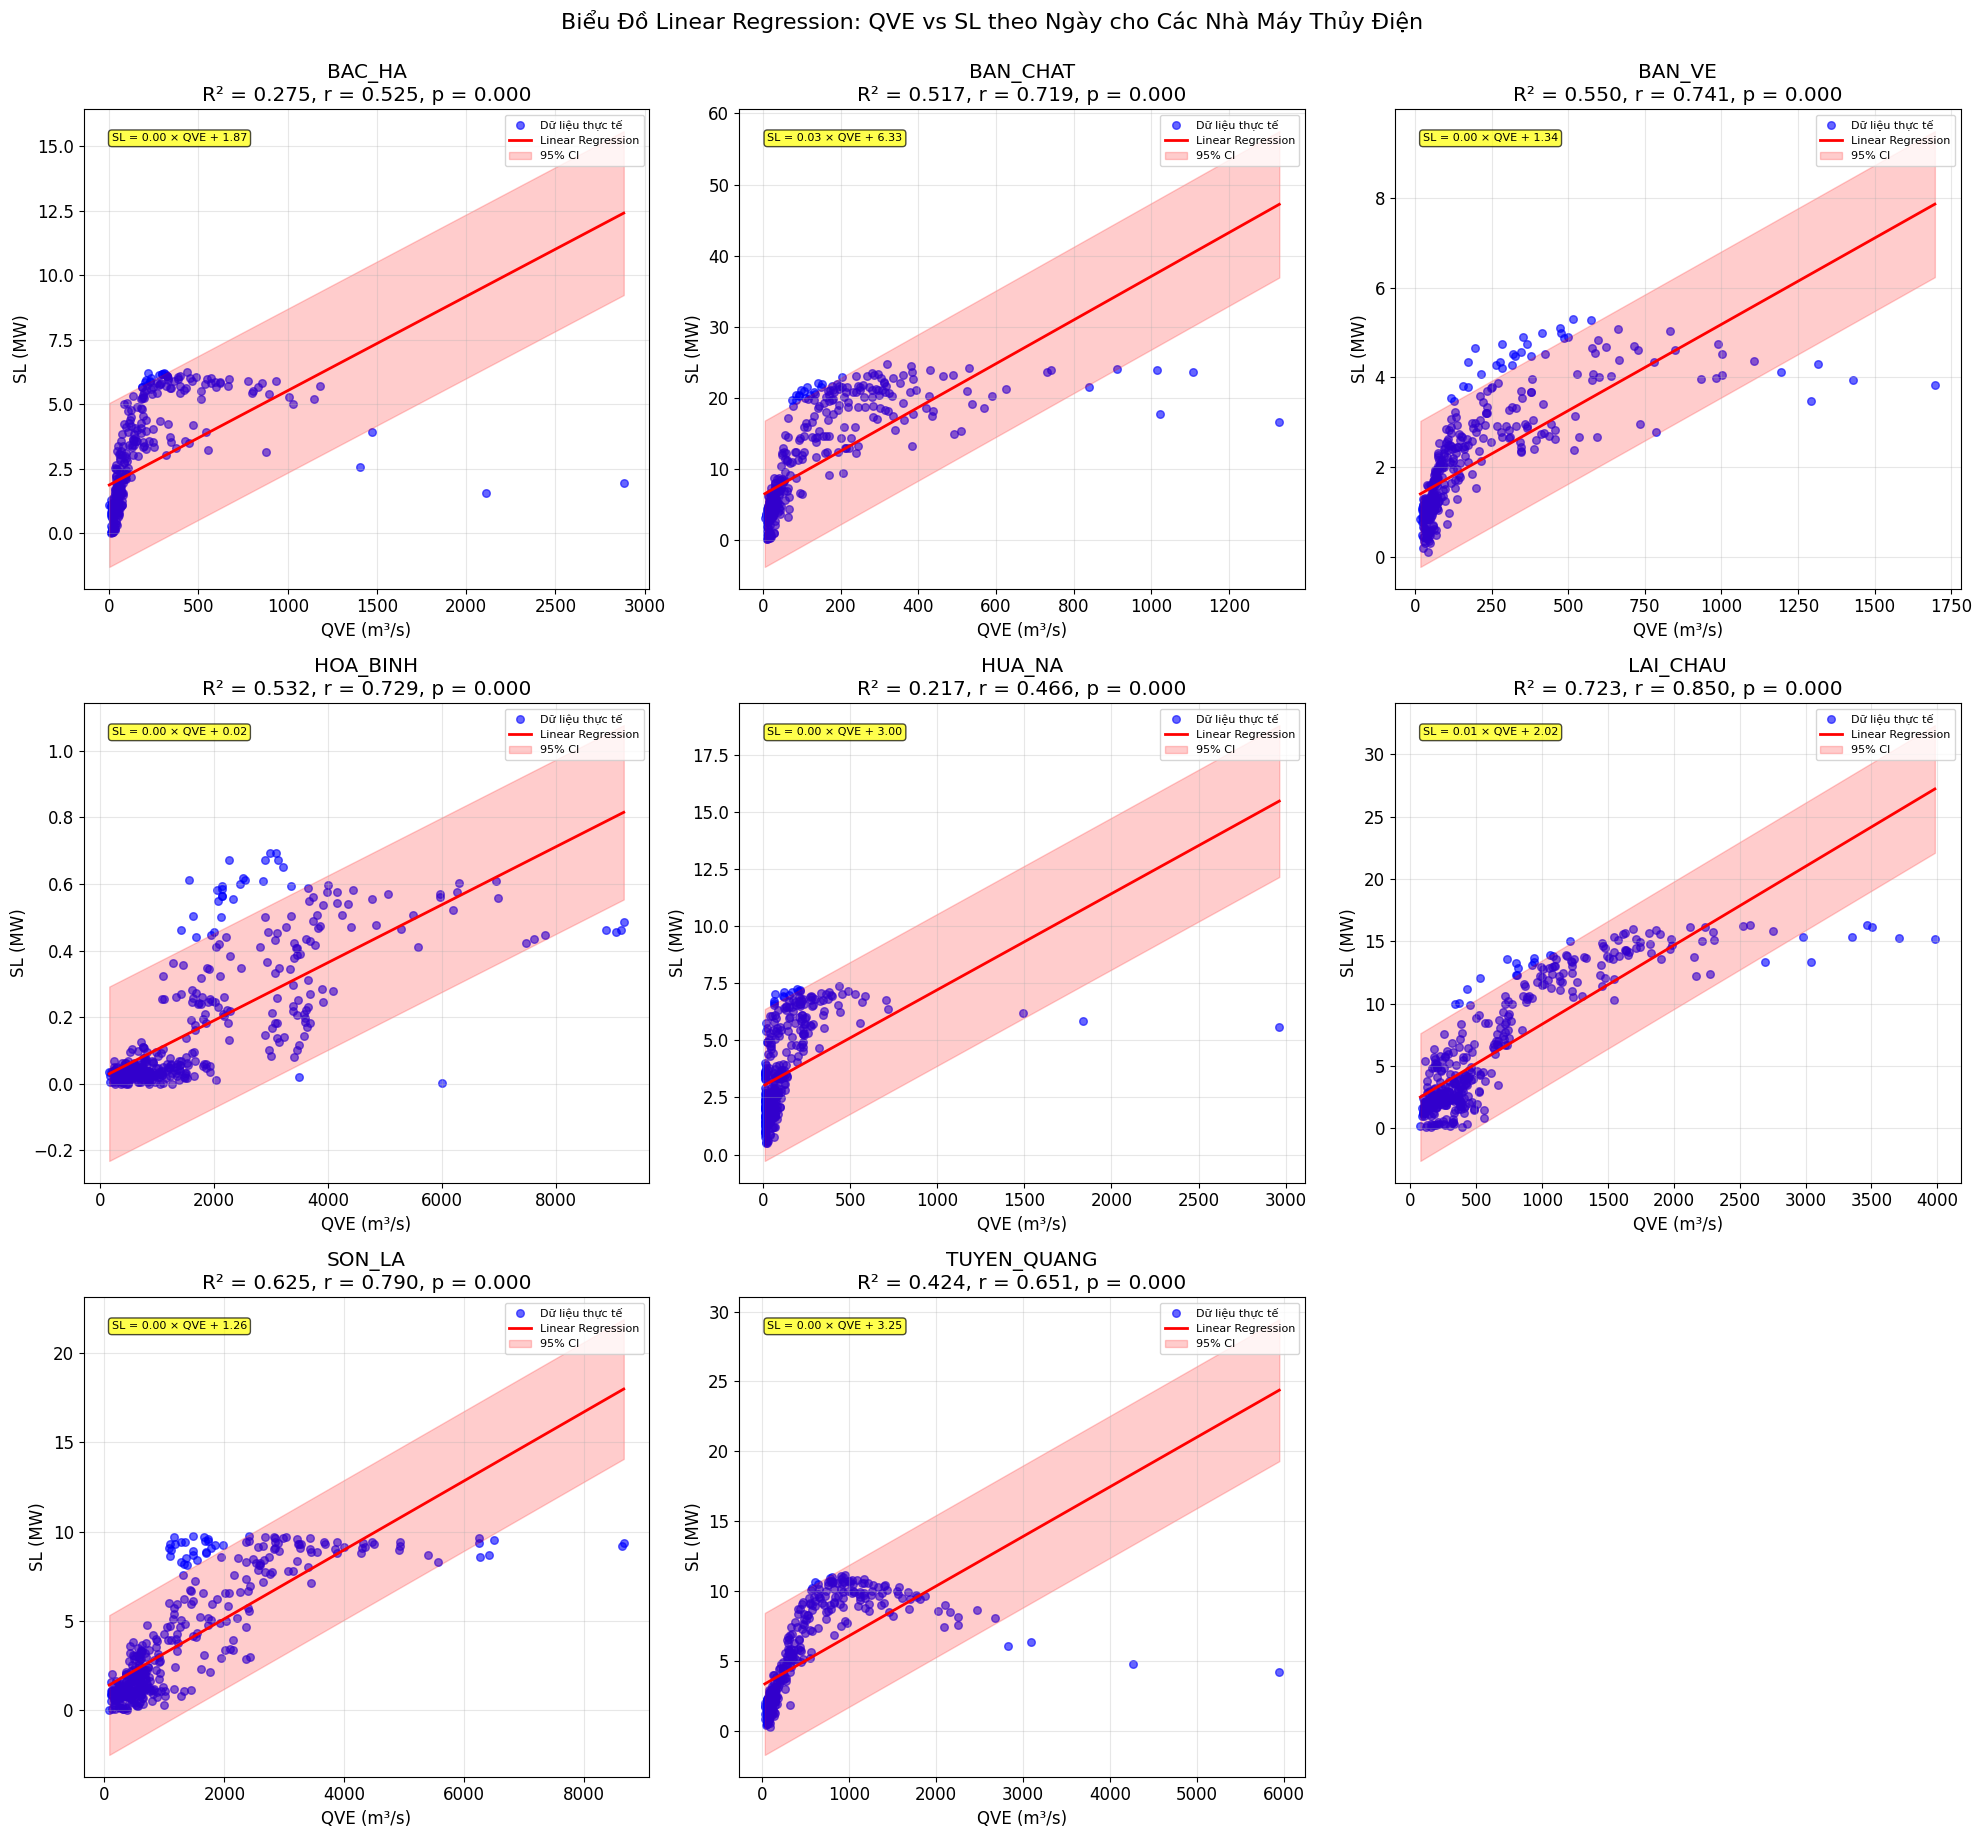

In [27]:
# Biểu đồ Linear Regression QVE vs SL theo ngày cho từng TD_THAMCHIEU
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Lọc dữ liệu hợp lệ
data_clean = data.dropna(subset=['QVE', 'SL', 'TD_THAMCHIEU'])

# Lấy danh sách nhà máy
power_plants = data_clean['TD_THAMCHIEU'].unique()
print(f"Các nhà máy: {power_plants}")

# Thiết lập subplot
n_plants = len(power_plants)
cols = 3
rows = (n_plants + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))
if rows == 1:
    axes = axes.reshape(1, -1)

# Dictionary để lưu kết quả
results = {}

for idx, plant in enumerate(power_plants):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col]
    
    # Lọc dữ liệu cho nhà máy
    plant_data = data_clean[data_clean['TD_THAMCHIEU'] == plant].copy()
    
    if len(plant_data) < 2:
        ax.text(0.5, 0.5, f'Không đủ dữ liệu\ncho {plant}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{plant}')
        continue
    
    # Chuẩn bị dữ liệu cho regression
    x = plant_data['QVE'].values.reshape(-1, 1)
    y = plant_data['SL'].values
    
    # Loại bỏ NaN nếu có
    mask = ~(np.isnan(x.flatten()) | np.isnan(y))
    x = x[mask]
    y = y[mask]
    
    if len(x) < 2:
        ax.text(0.5, 0.5, f'Không đủ dữ liệu hợp lệ\ncho {plant}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{plant}')
        continue
    
    # Tính Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(x.reshape(-1, 1), y)
    y_pred = lr_model.predict(x.reshape(-1, 1))
    
    # Tính các chỉ số thống kê
    r2 = r2_score(y, y_pred)
    pearson_corr, p_value = stats.pearsonr(x.flatten(), y)
    slope = lr_model.coef_[0]
    intercept = lr_model.intercept_
    
    # Lưu kết quả
    results[plant] = {
        'r2': r2,
        'correlation': pearson_corr,
        'p_value': p_value,
        'slope': slope,
        'intercept': intercept,
        'n_samples': len(x)
    }
    
    # Vẽ scatter plot
    ax.scatter(x, y, alpha=0.6, s=30, color='blue', label='Dữ liệu thực tế')
    
    # Vẽ regression line
    x_range = np.linspace(x.min(), x.max(), 100)
    y_range = lr_model.predict(x_range.reshape(-1, 1))
    ax.plot(x_range, y_range, 'r-', linewidth=2, label='Linear Regression')
    
    # Thêm confidence interval (95%)
    from scipy.stats import t
    n = len(x)
    if n > 2:
        y_err = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
        t_val = t.ppf(0.975, n - 2)
        
        y_upper = y_range + t_val * y_err
        y_lower = y_range - t_val * y_err
        ax.fill_between(x_range, y_lower, y_upper, alpha=0.2, color='red', 
                       label='95% CI')
    
    # Thiết lập tiêu đề và labels
    ax.set_title(f'{plant}\nR² = {r2:.3f}, r = {pearson_corr:.3f}, p = {p_value:.3f}', 
                color='black')
    ax.set_xlabel('QVE (m³/s)', color='black')
    ax.set_ylabel('SL (MW)', color='black')
    ax.tick_params(colors='black')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Thêm phương trình regression
    equation = f'SL = {slope:.2f} × QVE + {intercept:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, 
           bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
           fontsize=8, verticalalignment='top')

# Ẩn các subplot trống
for idx in range(n_plants, rows * cols):
    row = idx // cols
    col = idx % cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.suptitle('Biểu Đồ Linear Regression: QVE vs SL theo Ngày cho Các Nhà Máy Thủy Điện', 
             fontsize=16, y=1.02, color='black')

# In bảng kết quả
print("\n" + "="*80)
print("KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION")
print("="*80)
results_data = pd.DataFrame(results).T
results_data['correlation_strength'] = results_data['correlation'].apply(
    lambda x: 'Rất mạnh' if abs(x) >= 0.9 else
              'Mạnh' if abs(x) >= 0.7 else
              'Trung bình' if abs(x) >= 0.5 else
              'Yếu' if abs(x) >= 0.3 else 'Rất yếu'
)
results_data['significance'] = results_data['p_value'].apply(
    lambda x: 'Có ý nghĩa' if x < 0.05 else 'Không có ý nghĩa'
)

print(results_data[['correlation', 'r2', 'p_value', 'slope', 'correlation_strength', 'significance']].round(4))

plt.show()


Sử dụng cột ngày: Ngày
Dữ liệu sau khi tổng hợp theo tháng: 112 records
Khoảng thời gian: 2024-04 đến 2025-05
Các nhà máy: ['BAC_HA' 'BAN_CHAT' 'BAN_VE' 'HOA_BINH' 'HUA_NA' 'LAI_CHAU' 'SON_LA'
 'TUYEN_QUANG']

KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION THEO THÁNG
             n_months  correlation     r2  p_value  slope   avg_qve   avg_sl  \
BAC_HA           14.0        0.913  0.834    0.000  0.287   146.703   71.002   
BAN_CHAT         14.0        0.958  0.918    0.000  1.687   115.624  293.118   
BAN_VE           14.0        0.869  0.755    0.000  0.160   168.213   58.687   
HOA_BINH         14.0        0.925  0.855    0.000  0.003  1714.976    4.896   
HUA_NA           14.0        0.758  0.575    0.002  0.327   106.422  101.226   
LAI_CHAU         14.0        0.951  0.904    0.000  0.237   623.849  178.876   
SON_LA           14.0        0.931  0.866    0.000  0.079  1217.140  107.274   
TUYEN_QUANG      14.0        0.950  0.903    0.000  0.206   450.208  143.480   

            correlatio

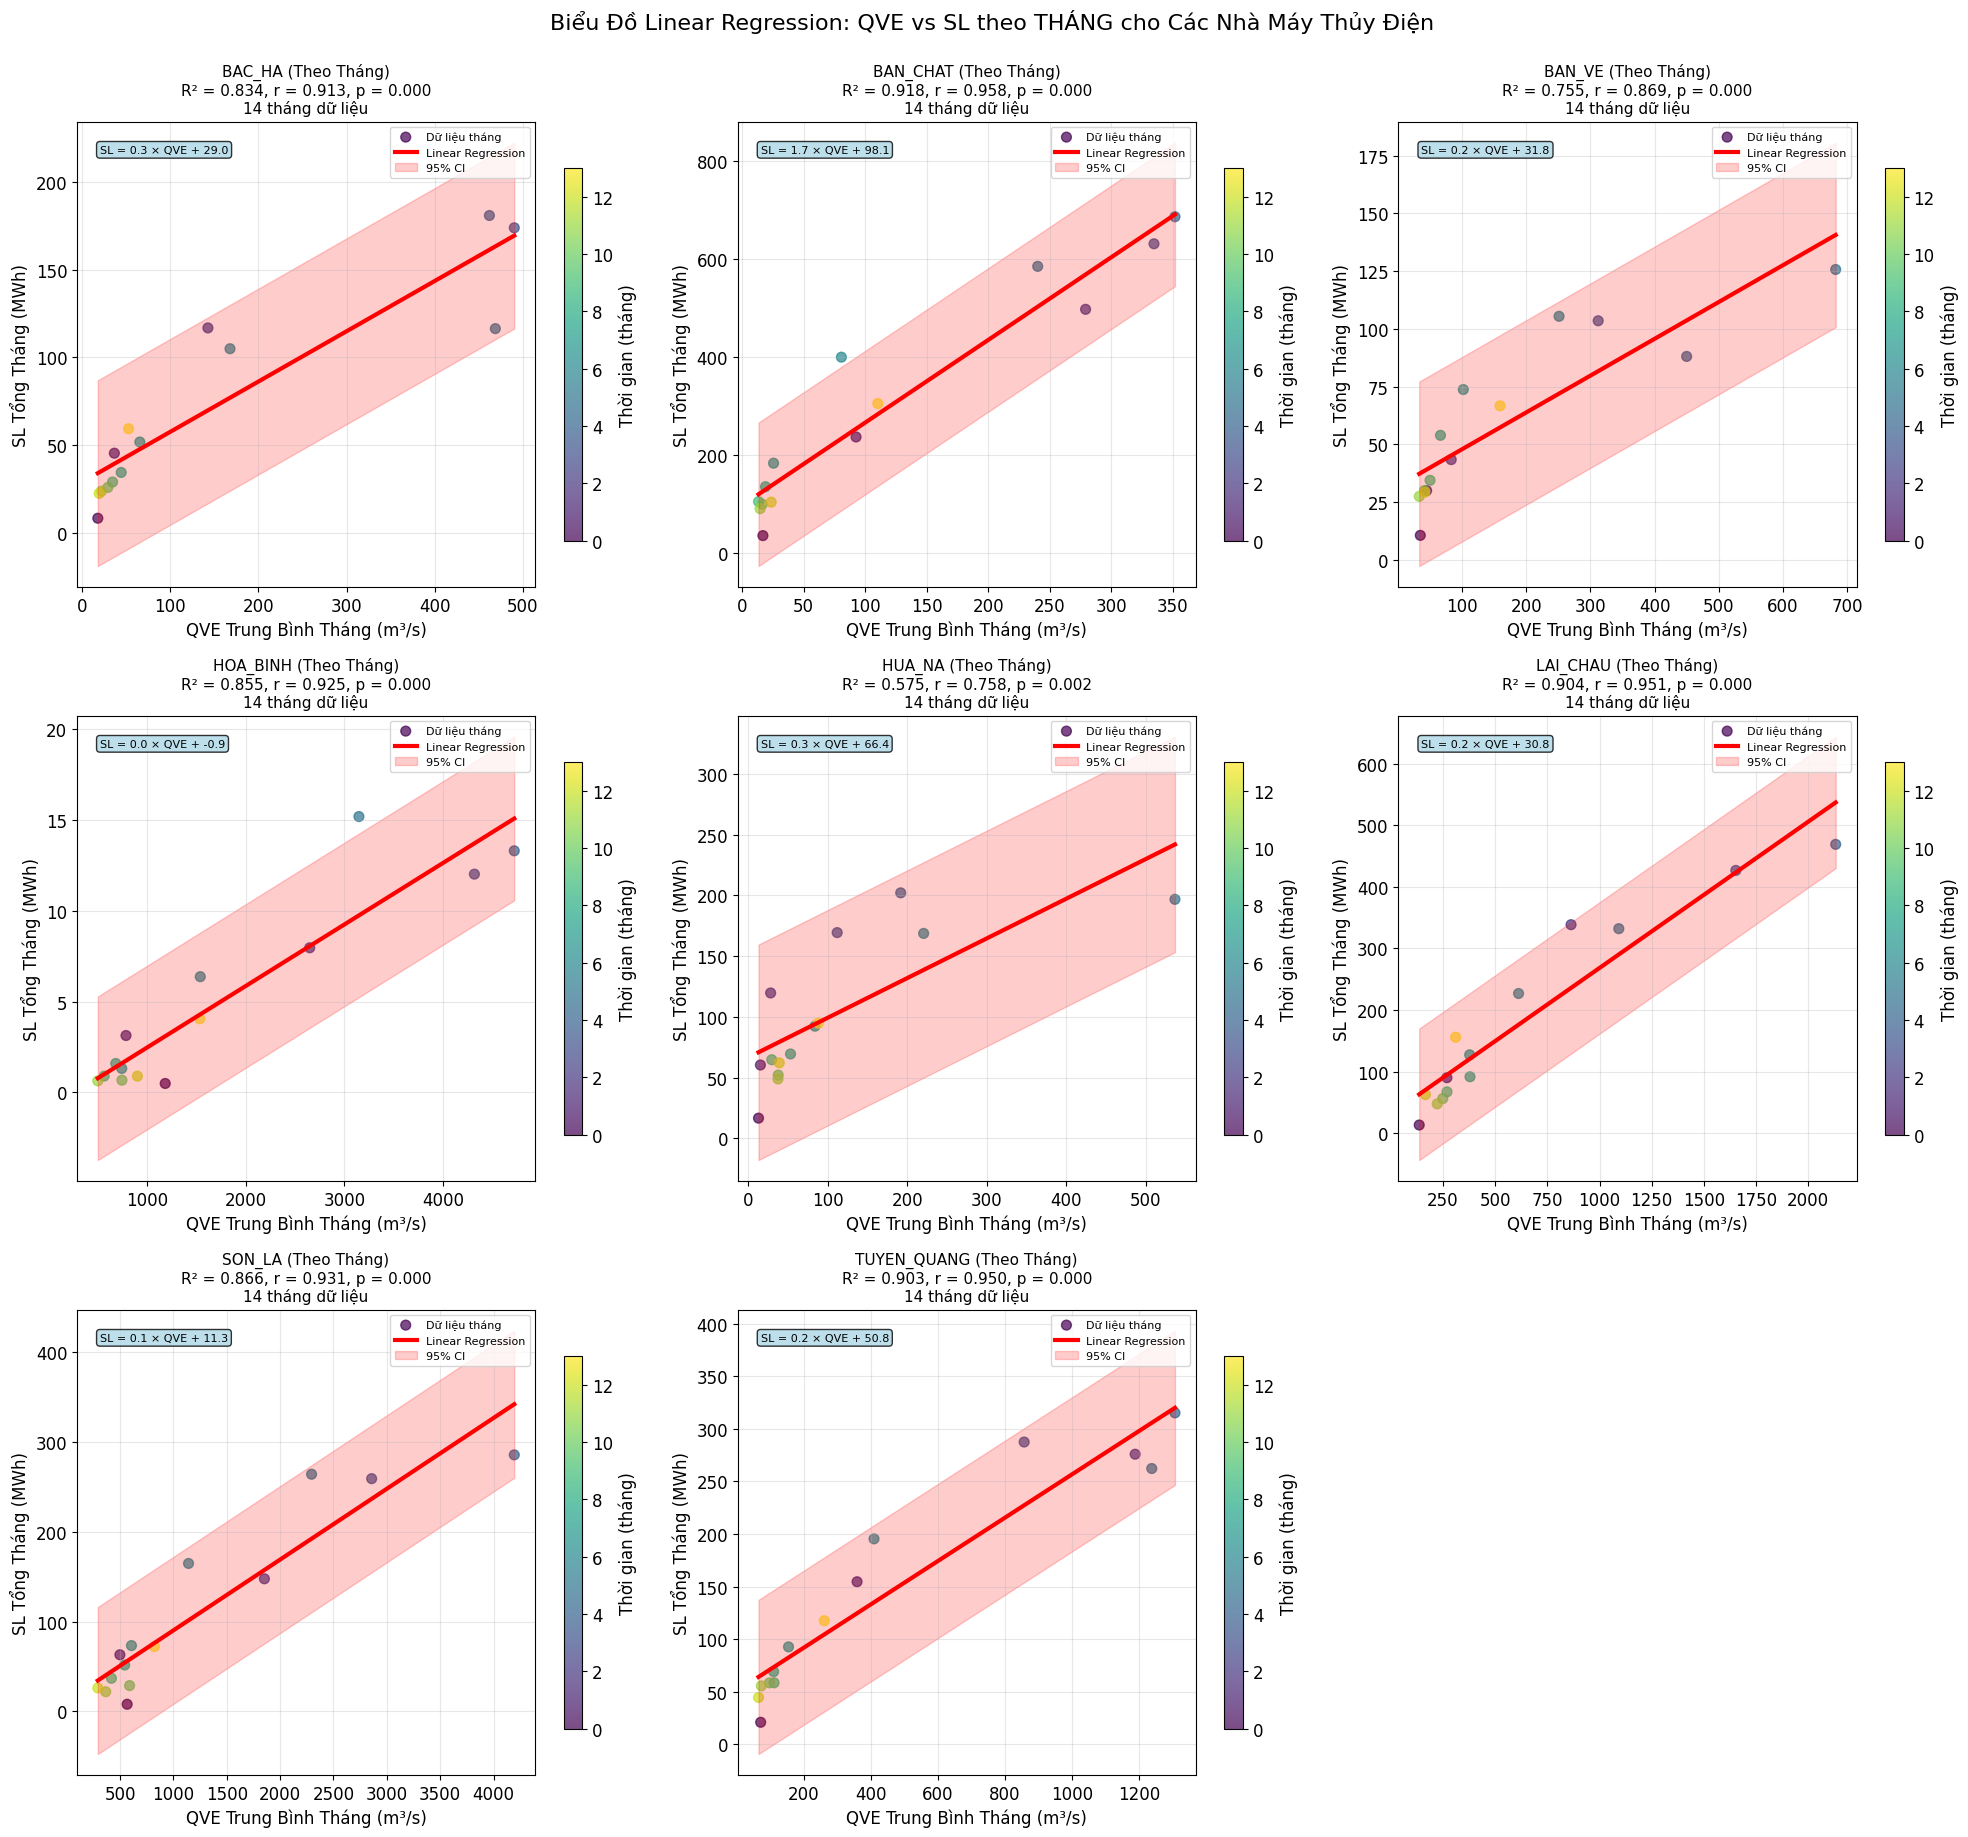

In [33]:
# Biểu đồ Linear Regression QVE vs SL theo THÁNG cho từng TD_THAMCHIEU
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Tìm cột ngày (có thể là 'Ngày' hoặc 'NGAY')
date_col = None
for col in data.columns:
    if 'ngày' in col.lower() or 'ngay' in col.lower() or 'date' in col.lower():
        date_col = col
        break

if date_col is None:
    print("Không tìm thấy cột ngày!")
else:
    print(f"Sử dụng cột ngày: {date_col}")
    
    # Chuyển đổi cột ngày và thêm cột tháng-năm
    data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
    data['Year_Month'] = data[date_col].dt.to_period('M')
    
    # Tổng hợp dữ liệu theo tháng cho từng nhà máy
    monthly_data = data.groupby(['TD_THAMCHIEU', 'Year_Month']).agg({
        'QVE': 'mean',  # Trung bình QVE trong tháng
        'SL': 'sum'     # Tổng SL trong tháng
    }).reset_index()
    
    # Lọc dữ liệu hợp lệ
    monthly_clean = monthly_data.dropna(subset=['QVE', 'SL'])
    
    print(f"Dữ liệu sau khi tổng hợp theo tháng: {len(monthly_clean)} records")
    print(f"Khoảng thời gian: {monthly_clean['Year_Month'].min()} đến {monthly_clean['Year_Month'].max()}")
    
    # Lấy danh sách nhà máy
    power_plants = monthly_clean['TD_THAMCHIEU'].unique()
    print(f"Các nhà máy: {power_plants}")
    
    # Thiết lập subplot
    n_plants = len(power_plants)
    cols = 3
    rows = (n_plants + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    # Dictionary để lưu kết quả
    monthly_results = {}
    
    for idx, plant in enumerate(power_plants):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col]
        
        # Lọc dữ liệu cho nhà máy
        plant_data = monthly_clean[monthly_clean['TD_THAMCHIEU'] == plant].copy()
        
        if len(plant_data) < 3:  # Cần ít nhất 3 tháng dữ liệu
            ax.text(0.5, 0.5, f'Không đủ dữ liệu\ncho {plant}\n({len(plant_data)} tháng)', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{plant}')
            continue
        
        # Chuẩn bị dữ liệu cho regression
        x = plant_data['QVE'].values.reshape(-1, 1)
        y = plant_data['SL'].values
        
        # Loại bỏ NaN nếu có
        mask = ~(np.isnan(x.flatten()) | np.isnan(y))
        x = x[mask]
        y = y[mask]
        
        if len(x) < 3:
            ax.text(0.5, 0.5, f'Không đủ dữ liệu hợp lệ\ncho {plant}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{plant}')
            continue
        
        # Tính Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(x.reshape(-1, 1), y)
        y_pred = lr_model.predict(x.reshape(-1, 1))
        
        # Tính các chỉ số thống kê
        r2 = r2_score(y, y_pred)
        pearson_corr, p_value = stats.pearsonr(x.flatten(), y)
        slope = lr_model.coef_[0]
        intercept = lr_model.intercept_
        
        # Lưu kết quả
        monthly_results[plant] = {
            'r2': r2,
            'correlation': pearson_corr,
            'p_value': p_value,
            'slope': slope,
            'intercept': intercept,
            'n_months': len(x),
            'avg_qve': x.mean(),
            'avg_sl': y.mean()
        }
        
        # Vẽ scatter plot với màu sắc theo thời gian
        scatter = ax.scatter(x, y, alpha=0.7, s=50, 
                           c=range(len(x)), cmap='viridis', 
                           label='Dữ liệu tháng')
        
        # Vẽ regression line
        x_range = np.linspace(x.min(), x.max(), 100)
        y_range = lr_model.predict(x_range.reshape(-1, 1))
        ax.plot(x_range, y_range, 'r-', linewidth=3, label='Linear Regression')
        
        # Thêm confidence interval (95%)
        from scipy.stats import t
        n = len(x)
        if n > 2:
            y_err = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
            t_val = t.ppf(0.975, n - 2)
            
            y_upper = y_range + t_val * y_err
            y_lower = y_range - t_val * y_err
            ax.fill_between(x_range, y_lower, y_upper, alpha=0.2, color='red', 
                           label='95% CI')
        
        # Thiết lập tiêu đề và labels
        ax.set_title(f'{plant} (Theo Tháng)\nR² = {r2:.3f}, r = {pearson_corr:.3f}, p = {p_value:.3f}\n{len(x)} tháng dữ liệu', 
                    color='black', fontsize=11)
        ax.set_xlabel('QVE Trung Bình Tháng (m³/s)', color='black')
        ax.set_ylabel('SL Tổng Tháng (MWh)', color='black')
        ax.tick_params(colors='black')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        
        # Thêm phương trình regression
        equation = f'SL = {slope:.1f} × QVE + {intercept:.1f}'
        ax.text(0.05, 0.95, equation, transform=ax.transAxes, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
               fontsize=8, verticalalignment='top')
        
        # Thêm colorbar cho scatter plot
        if len(x) > 5:  # Chỉ thêm colorbar nếu có đủ dữ liệu
            plt.colorbar(scatter, ax=ax, label='Thời gian (tháng)', shrink=0.8)
    
    # Ẩn các subplot trống
    for idx in range(n_plants, rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Biểu Đồ Linear Regression: QVE vs SL theo THÁNG cho Các Nhà Máy Thủy Điện', 
                 fontsize=16, y=1.02, color='black')
    
    # In bảng kết quả theo tháng
    print("\n" + "="*90)
    print("KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION THEO THÁNG")
    print("="*90)
    
    if monthly_results:
        results_data = pd.DataFrame(monthly_results).T
        results_data['correlation_strength'] = results_data['correlation'].apply(
            lambda x: 'Rất mạnh' if abs(x) >= 0.85 else
                      'Mạnh' if abs(x) >= 0.65 else
                      'Trung bình' if abs(x) >= 0.45 else
                      'Yếu' if abs(x) >= 0.25 else 'Rất yếu'
        )
        results_data['significance'] = results_data['p_value'].apply(
            lambda x: 'Có ý nghĩa' if x < 0.05 else 'Không có ý nghĩa'
        )
        
        # Hiển thị kết quả với định dạng đẹp
        display_cols = ['n_months', 'correlation', 'r2', 'p_value', 'slope', 
                       'avg_qve', 'avg_sl', 'correlation_strength', 'significance']
        print(results_data[display_cols].round(3))
        
        # Thống kê tổng quan
        print(f"\nTHỐNG KÊ TỔNG QUAN:")
        print(f"- Số nhà máy có tương quan mạnh (|r| ≥ 0.65): {sum(abs(results_data['correlation']) >= 0.65)}")
        print(f"- Số nhà máy có ý nghĩa thống kê (p < 0.05): {sum(results_data['p_value'] < 0.05)}")
        print(f"- R² trung bình: {results_data['r2'].mean():.3f}")
        print(f"- Correlation trung bình: {results_data['correlation'].mean():.3f}")
        
        # Nhà máy có tương quan cao nhất
        best_plant = results_data.loc[results_data['correlation'].abs().idxmax()]
        print(f"- Nhà máy có tương quan cao nhất: {best_plant.name} (r = {best_plant['correlation']:.3f})")
    
    plt.show()

Sử dụng cột ngày: Ngày
Dữ liệu sau khi tổng hợp theo tuần: 472 records
Khoảng thời gian: 2024-04-15/2024-04-21 đến 2025-05-26/2025-06-01
Các nhà máy: ['BAC_HA' 'BAN_CHAT' 'BAN_VE' 'HOA_BINH' 'HUA_NA' 'LAI_CHAU' 'SON_LA'
 'TUYEN_QUANG']

KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION THEO TUẦN
             n_weeks  correlation     r2  p_value  slope   avg_qve  avg_sl  \
BAC_HA          59.0        0.667  0.445      0.0  0.038   151.763  16.848   
BAN_CHAT        59.0        0.828  0.686      0.0  0.285   119.651  69.554   
BAN_VE          59.0        0.818  0.670      0.0  0.032   173.988  13.926   
HOA_BINH        59.0        0.836  0.699      0.0  0.001  1738.982   1.162   
HUA_NA          59.0        0.658  0.434      0.0  0.053   109.726  24.020   
LAI_CHAU        59.0        0.884  0.782      0.0  0.047   643.400  42.445   
SON_LA          59.0        0.847  0.718      0.0  0.015  1242.729  25.455   
TUYEN_QUANG     59.0        0.794  0.630      0.0  0.034   464.433  34.046   

            co

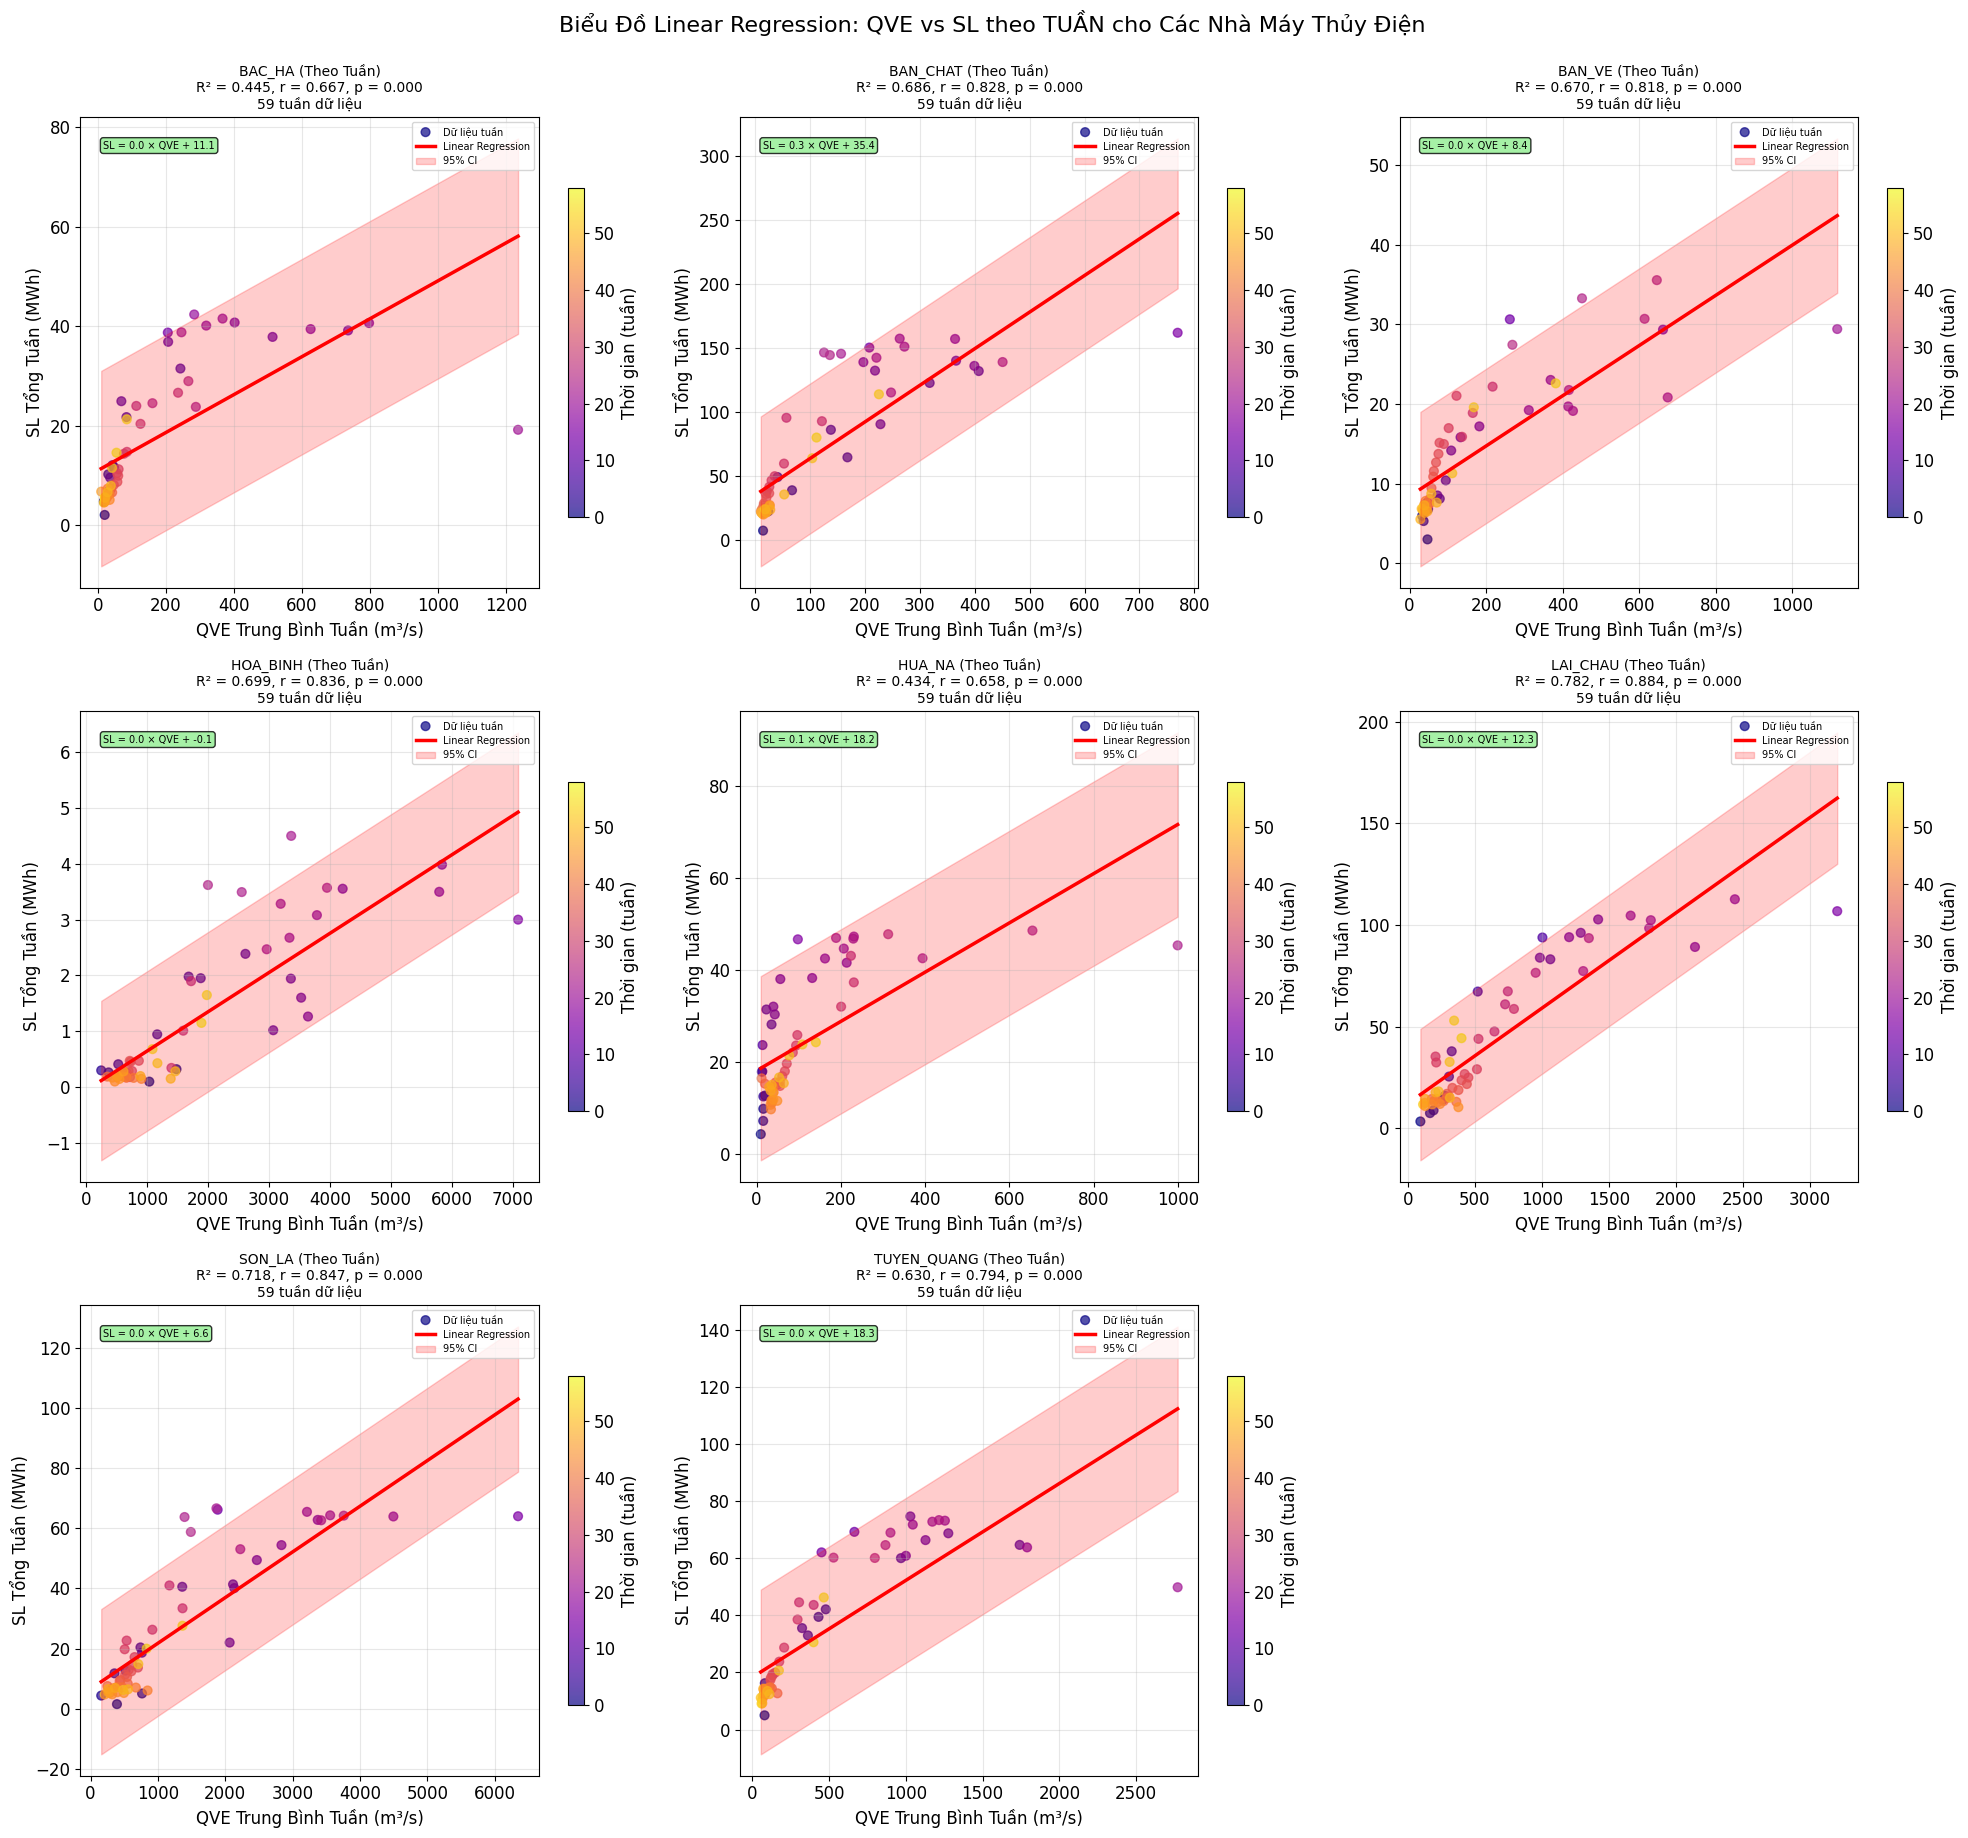

In [34]:
# Biểu đồ Linear Regression QVE vs SL theo TUẦN cho từng TD_THAMCHIEU
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Tìm cột ngày (có thể là 'Ngày' hoặc 'NGAY')
date_col = None
for col in data.columns:
    if 'ngày' in col.lower() or 'ngay' in col.lower() or 'date' in col.lower():
        date_col = col
        break

if date_col is None:
    print("Không tìm thấy cột ngày!")
else:
    print(f"Sử dụng cột ngày: {date_col}")
    
    # Chuyển đổi cột ngày và thêm cột tuần-năm
    data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
    data['Year_Week'] = data[date_col].dt.to_period('W')
    
    # Tổng hợp dữ liệu theo tuần cho từng nhà máy
    weekly_data = data.groupby(['TD_THAMCHIEU', 'Year_Week']).agg({
        'QVE': 'mean',  # Trung bình QVE trong tuần
        'SL': 'sum'     # Tổng SL trong tuần
    }).reset_index()
    
    # Lọc dữ liệu hợp lệ
    weekly_clean = weekly_data.dropna(subset=['QVE', 'SL'])
    
    print(f"Dữ liệu sau khi tổng hợp theo tuần: {len(weekly_clean)} records")
    print(f"Khoảng thời gian: {weekly_clean['Year_Week'].min()} đến {weekly_clean['Year_Week'].max()}")
    
    # Lấy danh sách nhà máy
    power_plants = weekly_clean['TD_THAMCHIEU'].unique()
    print(f"Các nhà máy: {power_plants}")
    
    # Thiết lập subplot
    n_plants = len(power_plants)
    cols = 3
    rows = (n_plants + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    # Dictionary để lưu kết quả
    weekly_results = {}
    
    for idx, plant in enumerate(power_plants):
        row = idx // cols
        col = idx % cols
        ax = axes[row, col]
        
        # Lọc dữ liệu cho nhà máy
        plant_data = weekly_clean[weekly_clean['TD_THAMCHIEU'] == plant].copy()
        
        if len(plant_data) < 5:  # Cần ít nhất 5 tuần dữ liệu
            ax.text(0.5, 0.5, f'Không đủ dữ liệu\ncho {plant}\n({len(plant_data)} tuần)', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{plant}')
            continue
        
        # Chuẩn bị dữ liệu cho regression
        x = plant_data['QVE'].values.reshape(-1, 1)
        y = plant_data['SL'].values
        
        # Loại bỏ NaN nếu có
        mask = ~(np.isnan(x.flatten()) | np.isnan(y))
        x = x[mask]
        y = y[mask]
        
        if len(x) < 5:
            ax.text(0.5, 0.5, f'Không đủ dữ liệu hợp lệ\ncho {plant}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{plant}')
            continue
        
        # Tính Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(x.reshape(-1, 1), y)
        y_pred = lr_model.predict(x.reshape(-1, 1))
        
        # Tính các chỉ số thống kê
        r2 = r2_score(y, y_pred)
        pearson_corr, p_value = stats.pearsonr(x.flatten(), y)
        slope = lr_model.coef_[0]
        intercept = lr_model.intercept_
        
        # Lưu kết quả
        weekly_results[plant] = {
            'r2': r2,
            'correlation': pearson_corr,
            'p_value': p_value,
            'slope': slope,
            'intercept': intercept,
            'n_weeks': len(x),
            'avg_qve': x.mean(),
            'avg_sl': y.mean()
        }
        
        # Vẽ scatter plot với màu sắc theo thời gian
        scatter = ax.scatter(x, y, alpha=0.7, s=40, 
                           c=range(len(x)), cmap='plasma', 
                           label='Dữ liệu tuần')
        
        # Vẽ regression line
        x_range = np.linspace(x.min(), x.max(), 100)
        y_range = lr_model.predict(x_range.reshape(-1, 1))
        ax.plot(x_range, y_range, 'r-', linewidth=2.5, label='Linear Regression')
        
        # Thêm confidence interval (95%)
        from scipy.stats import t
        n = len(x)
        if n > 2:
            y_err = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
            t_val = t.ppf(0.975, n - 2)
            
            y_upper = y_range + t_val * y_err
            y_lower = y_range - t_val * y_err
            ax.fill_between(x_range, y_lower, y_upper, alpha=0.2, color='red', 
                           label='95% CI')
        
        # Thiết lập tiêu đề và labels
        ax.set_title(f'{plant} (Theo Tuần)\nR² = {r2:.3f}, r = {pearson_corr:.3f}, p = {p_value:.3f}\n{len(x)} tuần dữ liệu', 
                    color='black', fontsize=10)
        ax.set_xlabel('QVE Trung Bình Tuần (m³/s)', color='black')
        ax.set_ylabel('SL Tổng Tuần (MWh)', color='black')
        ax.tick_params(colors='black')
        ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)
        
        # Thêm phương trình regression
        equation = f'SL = {slope:.1f} × QVE + {intercept:.1f}'
        ax.text(0.05, 0.95, equation, transform=ax.transAxes, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
               fontsize=7, verticalalignment='top')
        
        # Thêm colorbar cho scatter plot
        if len(x) > 8:  # Chỉ thêm colorbar nếu có đủ dữ liệu
            plt.colorbar(scatter, ax=ax, label='Thời gian (tuần)', shrink=0.7)
    
    # Ẩn các subplot trống
    for idx in range(n_plants, rows * cols):
        row = idx // cols
        col = idx % cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Biểu Đồ Linear Regression: QVE vs SL theo TUẦN cho Các Nhà Máy Thủy Điện', 
                 fontsize=16, y=1.02, color='black')
    
    # In bảng kết quả theo tuần
    print("\n" + "="*90)
    print("KẾT QUẢ PHÂN TÍCH LINEAR REGRESSION THEO TUẦN")
    print("="*90)
    
    if weekly_results:
        results_data = pd.DataFrame(weekly_results).T
        results_data['correlation_strength'] = results_data['correlation'].apply(
            lambda x: 'Rất mạnh' if abs(x) >= 0.8 else
                      'Mạnh' if abs(x) >= 0.6 else
                      'Trung bình' if abs(x) >= 0.4 else
                      'Yếu' if abs(x) >= 0.2 else 'Rất yếu'
        )
        results_data['significance'] = results_data['p_value'].apply(
            lambda x: 'Có ý nghĩa' if x < 0.05 else 'Không có ý nghĩa'
        )
        
        # Hiển thị kết quả với định dạng đẹp
        display_cols = ['n_weeks', 'correlation', 'r2', 'p_value', 'slope', 
                       'avg_qve', 'avg_sl', 'correlation_strength', 'significance']
        print(results_data[display_cols].round(3))
        
        # Thống kê tổng quan
        print(f"\nTHỐNG KÊ TỔNG QUAN:")
        print(f"- Số nhà máy có tương quan mạnh (|r| ≥ 0.6): {sum(abs(results_data['correlation']) >= 0.6)}")
        print(f"- Số nhà máy có ý nghĩa thống kê (p < 0.05): {sum(results_data['p_value'] < 0.05)}")
        print(f"- R² trung bình: {results_data['r2'].mean():.3f}")
        print(f"- Correlation trung bình: {results_data['correlation'].mean():.3f}")
        
        # Nhà máy có tương quan cao nhất
        best_plant = results_data.loc[results_data['correlation'].abs().idxmax()]
        print(f"- Nhà máy có tương quan cao nhất: {best_plant.name} (r = {best_plant['correlation']:.3f})")
        
        # So sánh với phân tích theo ngày
        print(f"\nSO SÁNH VỚI PHÂN TÍCH THEO NGÀY:")
        print(f"- Phân tích theo tuần có xu hướng cho kết quả ổn định hơn do giảm nhiễu ngắn hạn")
        print(f"- Dữ liệu được tổng hợp giúp làm nổi bật xu hướng dài hạn")
    
    plt.show()